# Classification Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Dataset
df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0    ...                    NaN                  NaN                 NaN   
1    ...                    NaN                  NaN                 NaN   
2    ...                    NaN                  NaN                 NaN   
3    ...                 2019.0                  NaN          617.789264   
4    ...                 2019.0                  NaN         3035.550000   
..   ...                    ...                  ...                 ...   
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN                  NaN                 NaN   
904  ...                    NaN                  NaN                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3            843.747000          886.004428          663.774500   
4           5916.370000         6243.000000         5385.579736   
..                  ...                 ...                 ...   
902            0.994875          233.596650          865.400000   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                    NaN                  NaN                            NaN   
1                    NaN                  NaN                            NaN   
2                    NaN                  NaN                            NaN   
3             626.239128                  NaN  Central Electricity Authority   
4            7279.000000                  NaN  Central Electricity Authority   
..                   ...    

In [3]:
df.shape

(907, 27)

In [4]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [5]:
#Checking the columns of dataset
df.columns.tolist()

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'capacity_mw',
 'latitude',
 'longitude',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_gwh_2019',
 'generation_data_source',
 'estimated_generation_gwh']

In [6]:
#checking the null values
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [7]:
#Dropping the columns with no values
df = df.drop(['other_fuel3', 'wepp_id', 'generation_gwh_2013', 'generation_gwh_2019', 'estimated_generation_gwh', 
              'other_fuel2' ], axis=1)
df

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0            2.5   28.1839    73.2407        Solar         NaN   
1           98.0   24.7663    74.6090         Coal         NaN   
2           39.2   21.9038    69.3732         Wind         NaN   
3          135.0   23.8712    91.3602          Gas         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil   
..           ...       ...        ...          ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil   
903          3.0   12.8932    78.1654        Solar         NaN   
904         25.5   15.2758    75.5811         Wind         NaN   
905         80.0   24.3500    73.7477         Coal         NaN   
906         16.5    9.9344    77.4768         Wind         NaN   

     commissioning_year  ...                                source  \
0                2011.0  ...  National Renewable Energy Laboratory   
1                   NaN  ...                  Ultratech Cement ltd   
2                   NaN  ...                                   CDM   
3                2004.0  ...         Central Electricity Authority   
4                2015.0  ...         Central Electricity Authority   
..                  ...  ...                                   ...   
902              2016.0  ...         Central Electricity Authority   
903                 NaN  ...   Karnataka Power Corporation Limited   
904                 NaN  ...                                   CDM   
905                 NaN  ...                    Hindustan Zinc ltd   
906                 NaN  ...                                   CDM   

                                                   url  \
0    http://www.nrel.gov/csp/solarpaces/project_det...   
1                      http://www.ultratechcement.com/   
2    https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                               http://www.cea.nic.in/   
4                               http://www.cea.nic.in/   
..                                                 ...   
902                             http://www.cea.nic.in/   
903                          http://karnatakapower.com   
904  https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...   
905                           http://www.hzlindia.com/   
906  https://cdm.unfccc.int/Projects/DB/RWTUV134503...   

                       geolocation_source year_of_capacity_data  \
0    National Renewable Energy Laboratory                   NaN   
1                                     WRI                   NaN   
2                                     WRI                   NaN   
3                                     WRI                2019.0   
4                                     WRI                2019.0   
..                                    ...                   ...   
902                                   WRI                2019.0   
903                        Industry About                   NaN   
904                                   WRI                   NaN   
905                                   WRI                   NaN   
906                                   WRI                   NaN   

     generation_gwh_2014  g

In [8]:
#checking the null values
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [9]:
#Checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

country
IND    907
Name: count, dtype: int64


country_long
India    907
Name: count, dtype: int64


name
ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: count, Length: 907, dtype: int64


gppd_idnr
WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: count, Length: 907, dtype: int64


capacity_mw
5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: count, Length: 361, dtype: int64


latitude
19.0004    3
24.1917    3
24.8747    2
13.2450    2
11.5336    2
          ..
22.7554    1
27.1598    

In [11]:
#Fill the null values
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())

df['longitude'] = df['longitude'].fillna(df['longitude'].mean())

In [12]:
#checking the null values
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [13]:
#Fill the null values

df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

In [14]:
#checking the null values
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source          0
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [15]:
#Fill the null values

df['other_fuel1'] = df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])

df['commissioning_year'] = df['commissioning_year'].fillna(df['commissioning_year'].mean())

df['owner'] = df['owner'].fillna(df['owner'].mode()[0])

In [16]:
#checking the null values
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1                 0
commissioning_year          0
owner                       0
source                      0
url                         0
geolocation_source          0
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [17]:
#Fill the null values

df['year_of_capacity_data'] = df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].mode()[0])

df['generation_gwh_2014'] = df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean())

df['generation_gwh_2015'] = df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())

df['generation_gwh_2016'] = df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean())

df['generation_gwh_2017'] = df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean())

df['generation_gwh_2018'] = df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].mean())

df['generation_data_source'] = df['generation_data_source'].fillna(df['generation_data_source'].mode()[0])

In [18]:
#checking the null values
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

In [19]:
df

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0            2.5   28.1839    73.2407        Solar         Oil   
1           98.0   24.7663    74.6090         Coal         Oil   
2           39.2   21.9038    69.3732         Wind         Oil   
3          135.0   23.8712    91.3602          Gas         Oil   
4         1800.0   21.9603    82.4091         Coal         Oil   
..           ...       ...        ...          ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil   
903          3.0   12.8932    78.1654        Solar         Oil   
904         25.5   15.2758    75.5811         Wind         Oil   
905         80.0   24.3500    73.7477         Coal         Oil   
906         16.5    9.9344    77.4768         Wind         Oil   

     commissioning_year  ...                                source  \
0           2011.000000  ...  National Renewable Energy Laboratory   
1           1997.091082  ...                  Ultratech Cement ltd   
2           1997.091082  ...                                   CDM   
3           2004.000000  ...         Central Electricity Authority   
4           2015.000000  ...         Central Electricity Authority   
..                  ...  ...                                   ...   
902         2016.000000  ...         Central Electricity Authority   
903         1997.091082  ...   Karnataka Power Corporation Limited   
904         1997.091082  ...                                   CDM   
905         1997.091082  ...                    Hindustan Zinc ltd   
906         1997.091082  ...                                   CDM   

                                                   url  \
0    http://www.nrel.gov/csp/solarpaces/project_det...   
1                      http://www.ultratechcement.com/   
2    https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                               http://www.cea.nic.in/   
4                               http://www.cea.nic.in/   
..                                                 ...   
902                             http://www.cea.nic.in/   
903                          http://karnatakapower.com   
904  https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...   
905                           http://www.hzlindia.com/   
906  https://cdm.unfccc.int/Projects/DB/RWTUV134503...   

                       geolocation_source year_of_capacity_data  \
0    National Renewable Energy Laboratory                2019.0   
1                                     WRI                2019.0   
2                                     WRI                2019.0   
3                                     WRI                2019.0   
4                                     WRI                2019.0   
..                                    ...                   ...   
902                                   WRI                2019.0   
903                        Industry About                2019.0   
904                                   WRI                2019.0   
905                                   WRI                2019.0   
906                                   WRI                2019.0   

     generation_gwh_2014  g

In [20]:
#Seperating Numerical and Categorical columns

#Checking for Categorical columns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
print("Categorical Columns:", categorical_col)
print("\n")

#Checking for Numerical columns
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!= 'object':
        numerical_col.append(i)
print("Numerical Columns: ", numerical_col)

Categorical Columns: ['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'other_fuel1', 'owner', 'source', 'url', 'geolocation_source', 'generation_data_source']


Numerical Columns:  ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']


In [21]:
#Checking number of unique values in each column
df.nunique().to_frame('No. of unique values')

No. of unique values
country                                    1
country_long                               1
name                                     907
gppd_idnr                                907
capacity_mw                              361
latitude                                 837
longitude                                828
primary_fuel                               8
other_fuel1                                3
commissioning_year                        74
owner                                    280
source                                   191
url                                      304
geolocation_source                         3
year_of_capacity_data                      1
generation_gwh_2014                      372
generation_gwh_2015                      397
generation_gwh_2016                      404
generation_gwh_2017                      409
generation_gwh_2018                      411
generation_data_source                     1

In [22]:
df.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1  commissioning_year  ...  \
0   28.1839    73.2407        Solar         Oil         2011.000000  ...   
1   24.7663    74.6090         Coal         Oil         1997.091082  ...   
2   21.9038    69.3732         Wind         Oil         1997.091082  ...   
3   23.8712    91.3602          Gas         Oil         2004.000000  ...   
4   21.9603    82.4091         Coal         Oil         2015.000000  ...   

                                 source  \
0  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd   
2                                   CDM   
3         Central Electricity Authority   
4         Central Electricity Authority   

                                                 url  \
0  http://www.nrel.gov/csp/solarpaces/project_det...   
1                    http://www.ultratechcement.com/   
2  https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                             http://www.cea.nic.in/   
4                             http://www.cea.nic.in/   

                     geolocation_source year_of_capacity_data  \
0  National Renewable Energy Laboratory                2019.0   
1                                   WRI                2019.0   
2                                   WRI                2019.0   
3                                   WRI                2019.0   
4                                   WRI                2019.0   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0          2431.823590          2428.226946          2467.936859   
1          2431.823590          2428.226946          2467.936859   
2          2431.823590          2428.226946          2467.936859   
3           617.789264           843.747000           886.004428   
4          3035.550000          5916.370000          6243.000000   

   generation_gwh_2017  generation_gwh_2018         generation_data_source  
0          2547.759305          2600.804099  Central Electricity Authority  
1          2547.759305          2600.804099  Central Electricity Authority  
2          2547.759305          2600.804099  Central Electricity Authority  
3           663.774500           626.239128  Central Electricity Authority  
4          5385.579736          7279.000000  Central Electricity Authority  

[5 rows x 21 columns]

In [23]:
#Statistical summary of new columns
df.describe()

capacity_mw    latitude   longitude  commissioning_year  \
count   907.000000  907.000000  907.000000          907.000000   
mean    326.223755   21.197918   77.464907         1997.091082   
std     590.085456    6.079148    4.812291           13.016360   
min       0.000000    8.168900   68.644700         1927.000000   
25%      16.725000   17.072000   74.388900         1997.091082   
50%      59.200000   21.281800   76.979200         1997.091082   
75%     385.250000   25.176450   79.206100         2003.000000   
max    4760.000000   34.649000   95.408000         2018.000000   

       year_of_capacity_data  generation_gwh_2014  generation_gwh_2015  \
count                  907.0           907.000000           907.000000   
mean                  2019.0          2431.823590          2428.226946   
std                      0.0          2665.338608          2859.349132   
min                   2019.0             0.000000             0.000000   
25%                   2019.0          1211.362750           916.000000   
50%                   2019.0          2431.823590          2428.226946   
75%                   2019.0          2431.823590          2428.226946   
max                   2019.0         28127.000000         30539.000000   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
count           907.000000           907.000000           907.000000  
mean           2467.936859          2547.759305          2600.804099  
std            2877.890004          2921.502193          3030.808041  
min               0.000000             0.000000             0.000000  
25%             896.500214           882.594850           824.842340  
50%            2467.936859          2547.759305          2600.804099  
75%            2467.936859          2547.759305          2600.804099  
max           30015.000000         35116.000000         35136.000000

primary_fuel
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: count, dtype: int64


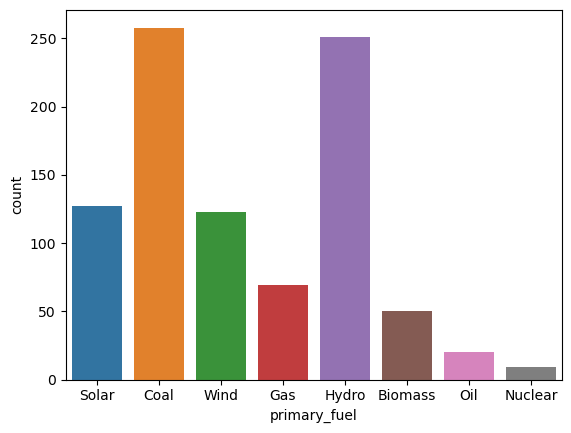

In [24]:
#Visualize the number of churned columns
ax = sns.countplot(x='primary_fuel', data=df)
print(df['primary_fuel'].value_counts())

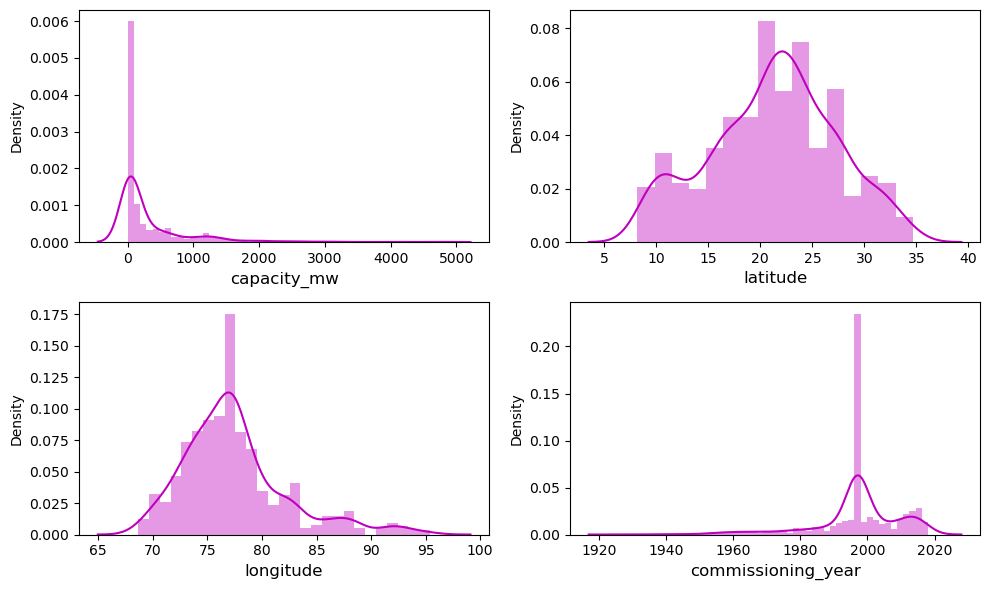

In [27]:
#Lets check how the data has been distributed in remaining column
plt.figure(figsize = (10,6), facecolor = 'white')
plotnumber = 1
for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df[col], color = 'm')
        plt.xlabel(col, fontsize = 12)
        plt.yticks(rotation = 0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

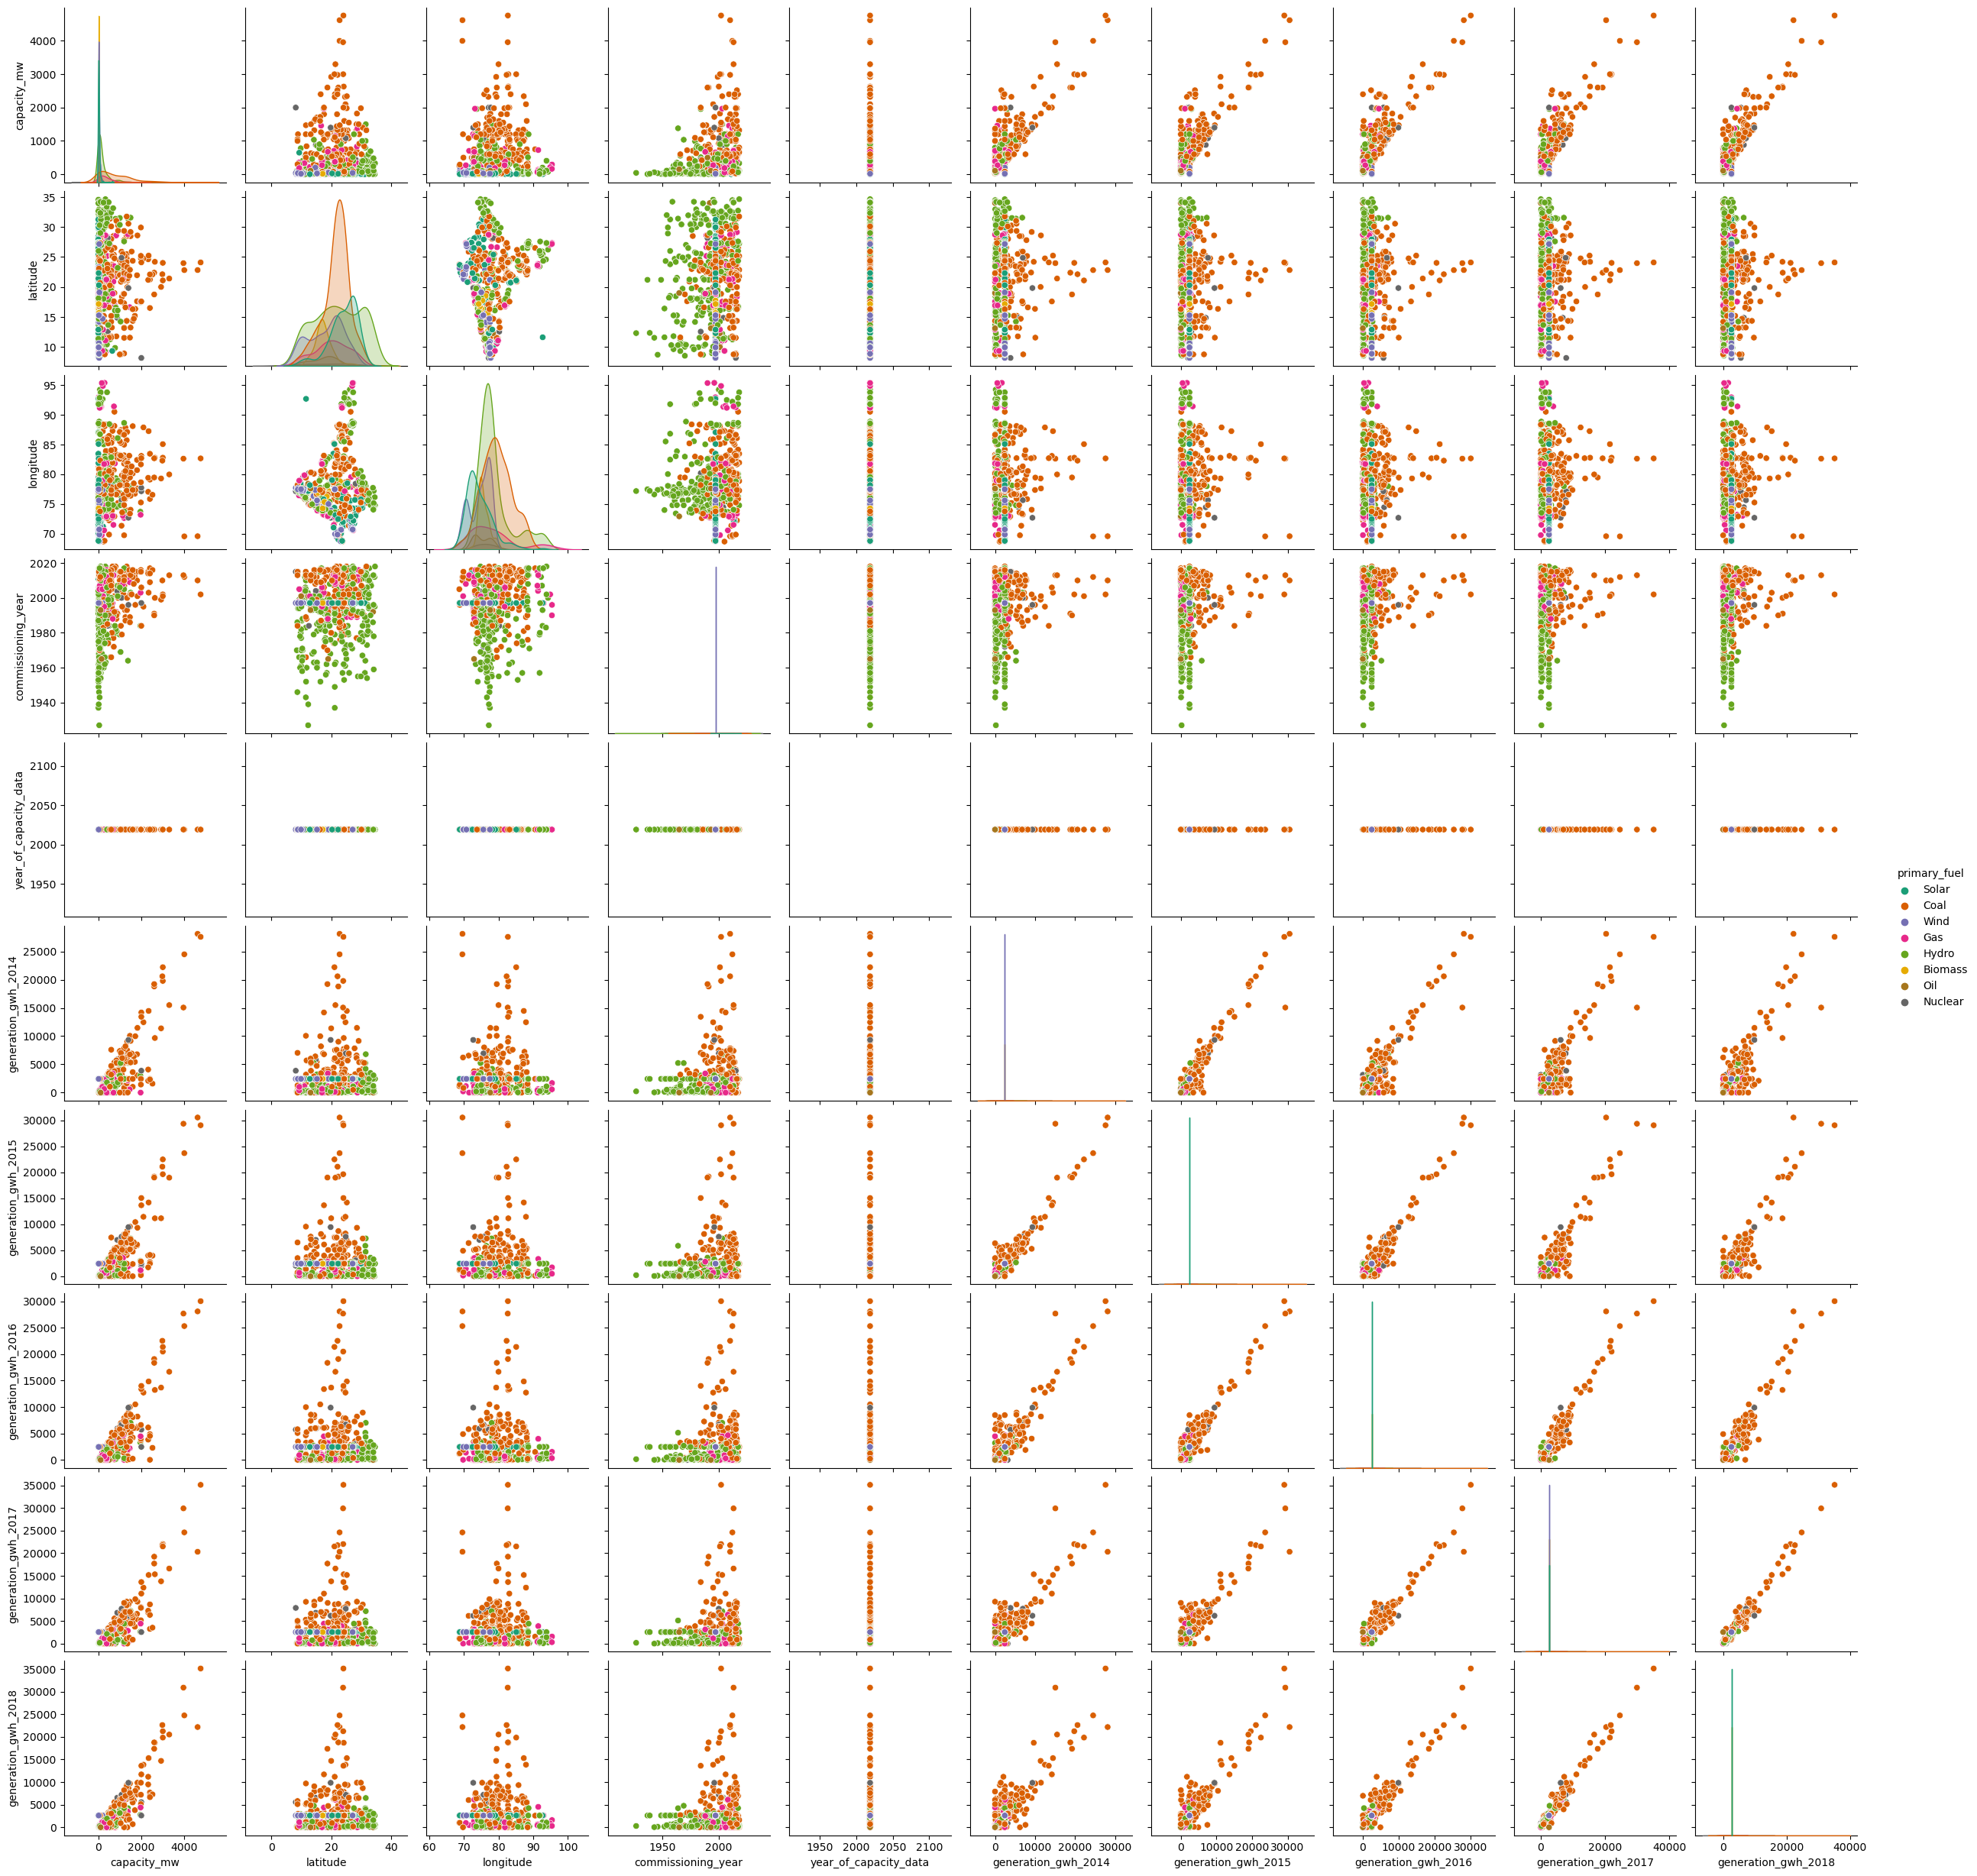

In [28]:
#Multivariate analysis
sns.pairplot(df, hue = 'primary_fuel', palette = 'Dark2')
plt.show()

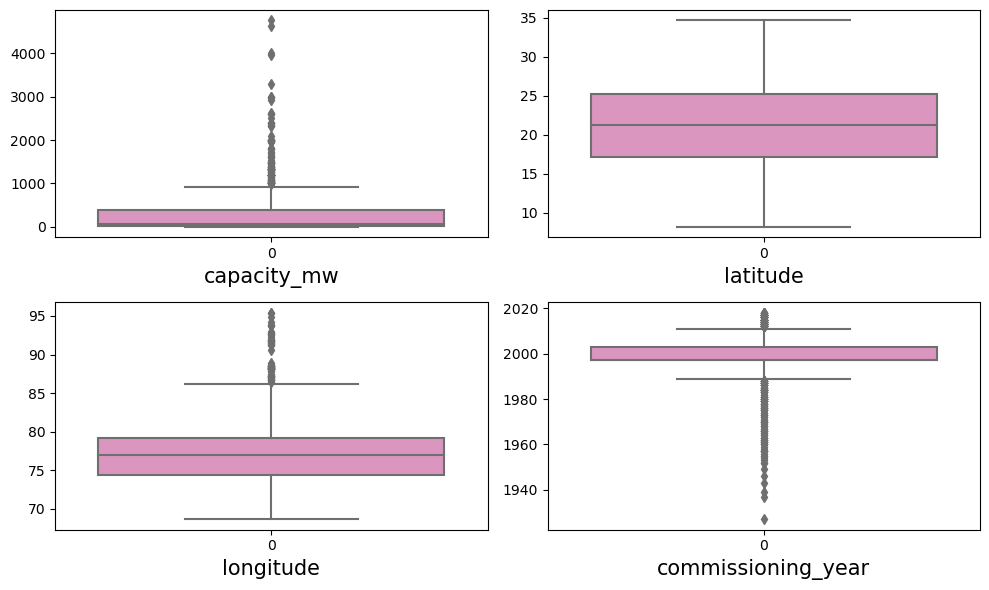

In [30]:
#Lets check the Outliers by plotting boxplot

plt.figure(figsize = (10,6), facecolor = 'white')
plotnumber = 1
for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.boxplot(df[col], palette = "Set2_r")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

In [32]:
#Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
df

country  country_long   name  gppd_idnr  capacity_mw  latitude  \
0        0.0           0.0    0.0      657.0          2.5   28.1839   
1        0.0           0.0    1.0      519.0         98.0   24.7663   
2        0.0           0.0    2.0      853.0         39.2   21.9038   
3        0.0           0.0    3.0        0.0        135.0   23.8712   
4        0.0           0.0    4.0        1.0       1800.0   21.9603   
..       ...           ...    ...        ...          ...       ...   
902      0.0           0.0  902.0      491.0       1600.0   16.2949   
903      0.0           0.0  903.0      822.0          3.0   12.8932   
904      0.0           0.0  904.0      891.0         25.5   15.2758   
905      0.0           0.0  905.0      539.0         80.0   24.3500   
906      0.0           0.0  906.0      876.0         16.5    9.9344   

     longitude  primary_fuel  other_fuel1  commissioning_year  ...  source  \
0      73.2407           6.0          2.0         2011.000000  ...   109.0   
1      74.6090           1.0          2.0         1997.091082  ...   174.0   
2      69.3732           7.0          2.0         1997.091082  ...    21.0   
3      91.3602           2.0          2.0         2004.000000  ...    22.0   
4      82.4091           1.0          2.0         2015.000000  ...    22.0   
..         ...           ...          ...                 ...  ...     ...   
902    77.3568           1.0          2.0         2016.000000  ...    22.0   
903    78.1654           6.0          2.0         1997.091082  ...    77.0   
904    75.5811           7.0          2.0         1997.091082  ...    21.0   
905    73.7477           1.0          2.0         1997.091082  ...    59.0   
906    77.4768           7.0          2.0         1997.091082  ...    21.0   

       url  geolocation_source  year_of_capacity_data  generation_gwh_2014  \
0    128.0                 1.0                 2019.0          2431.823590   
1    173.0                 2.0                 2019.0          2431.823590   
2    205.0                 2.0                 2019.0          2431.823590   
3     58.0                 2.0                 2019.0           617.789264   
4     58.0                 2.0                 2019.0          3035.550000   
..     ...                 ...                    ...                  ...   
902   58.0                 2.0                 2019.0          2431.823590   
903   22.0                 0.0                 2019.0          2431.823590   
904  260.0                 2.0                 2019.0          2431.823590   
905   82.0                 2.0                 2019.0          2431.823590   
906  245.0                 2.0                 2019.0          2431.823590   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0            2428.226946          2467.936859          2547.759305   
1            2428.226946          2467.936859          2547.759305   
2            2428.226946          2467.936859          2547.759305   
3             843.747000           886.004428           663.774500   
4            5916.370000          6243.000000          5385.579736   
..                   ...                  ...                  ...   
902             0.994875           233.596650           865.400000   
903          2428.226946          2467.936859          2547.759305   
904          2428.226946          2467.936859          2547.759305   
905          2428.226946          2467.936859          2547.759305   
906          2428.226946          2467.936859          2547.759305   

     generation_gwh_2018  generation_data_source  
0            2600.804099                     0.0  
1            2600.804099                     0.0  
2            2600.804099                     0.0  
3             626.239128                     0.0  
4            7279.000000                     0.0  
..                   ...                     ...  
902           686.500000                     0.0  
903          2600.804099     

In [33]:
#Find the Interquartile range to find the outliers

#1st quarantile
q1 = df.quantile(0.25)

#3rd quarantile
q3 = df.quantile(0.75)

#IQR
iqr = q3-q1

In [34]:
q1

country                      0.000000
country_long                 0.000000
name                       226.500000
gppd_idnr                  226.500000
capacity_mw                 16.725000
latitude                    17.072000
longitude                   74.388900
primary_fuel                 1.000000
other_fuel1                  2.000000
commissioning_year        1997.091082
owner                        5.000000
source                      22.000000
url                         58.000000
geolocation_source           2.000000
year_of_capacity_data     2019.000000
generation_gwh_2014       1211.362750
generation_gwh_2015        916.000000
generation_gwh_2016        896.500214
generation_gwh_2017        882.594850
generation_gwh_2018        824.842340
generation_data_source       0.000000
Name: 0.25, dtype: float64

In [35]:
q3

country                      0.000000
country_long                 0.000000
name                       679.500000
gppd_idnr                  679.500000
capacity_mw                385.250000
latitude                    25.176450
longitude                   79.206100
primary_fuel                 6.000000
other_fuel1                  2.000000
commissioning_year        2003.000000
owner                       95.500000
source                      29.500000
url                        115.500000
geolocation_source           2.000000
year_of_capacity_data     2019.000000
generation_gwh_2014       2431.823590
generation_gwh_2015       2428.226946
generation_gwh_2016       2467.936859
generation_gwh_2017       2547.759305
generation_gwh_2018       2600.804099
generation_data_source       0.000000
Name: 0.75, dtype: float64

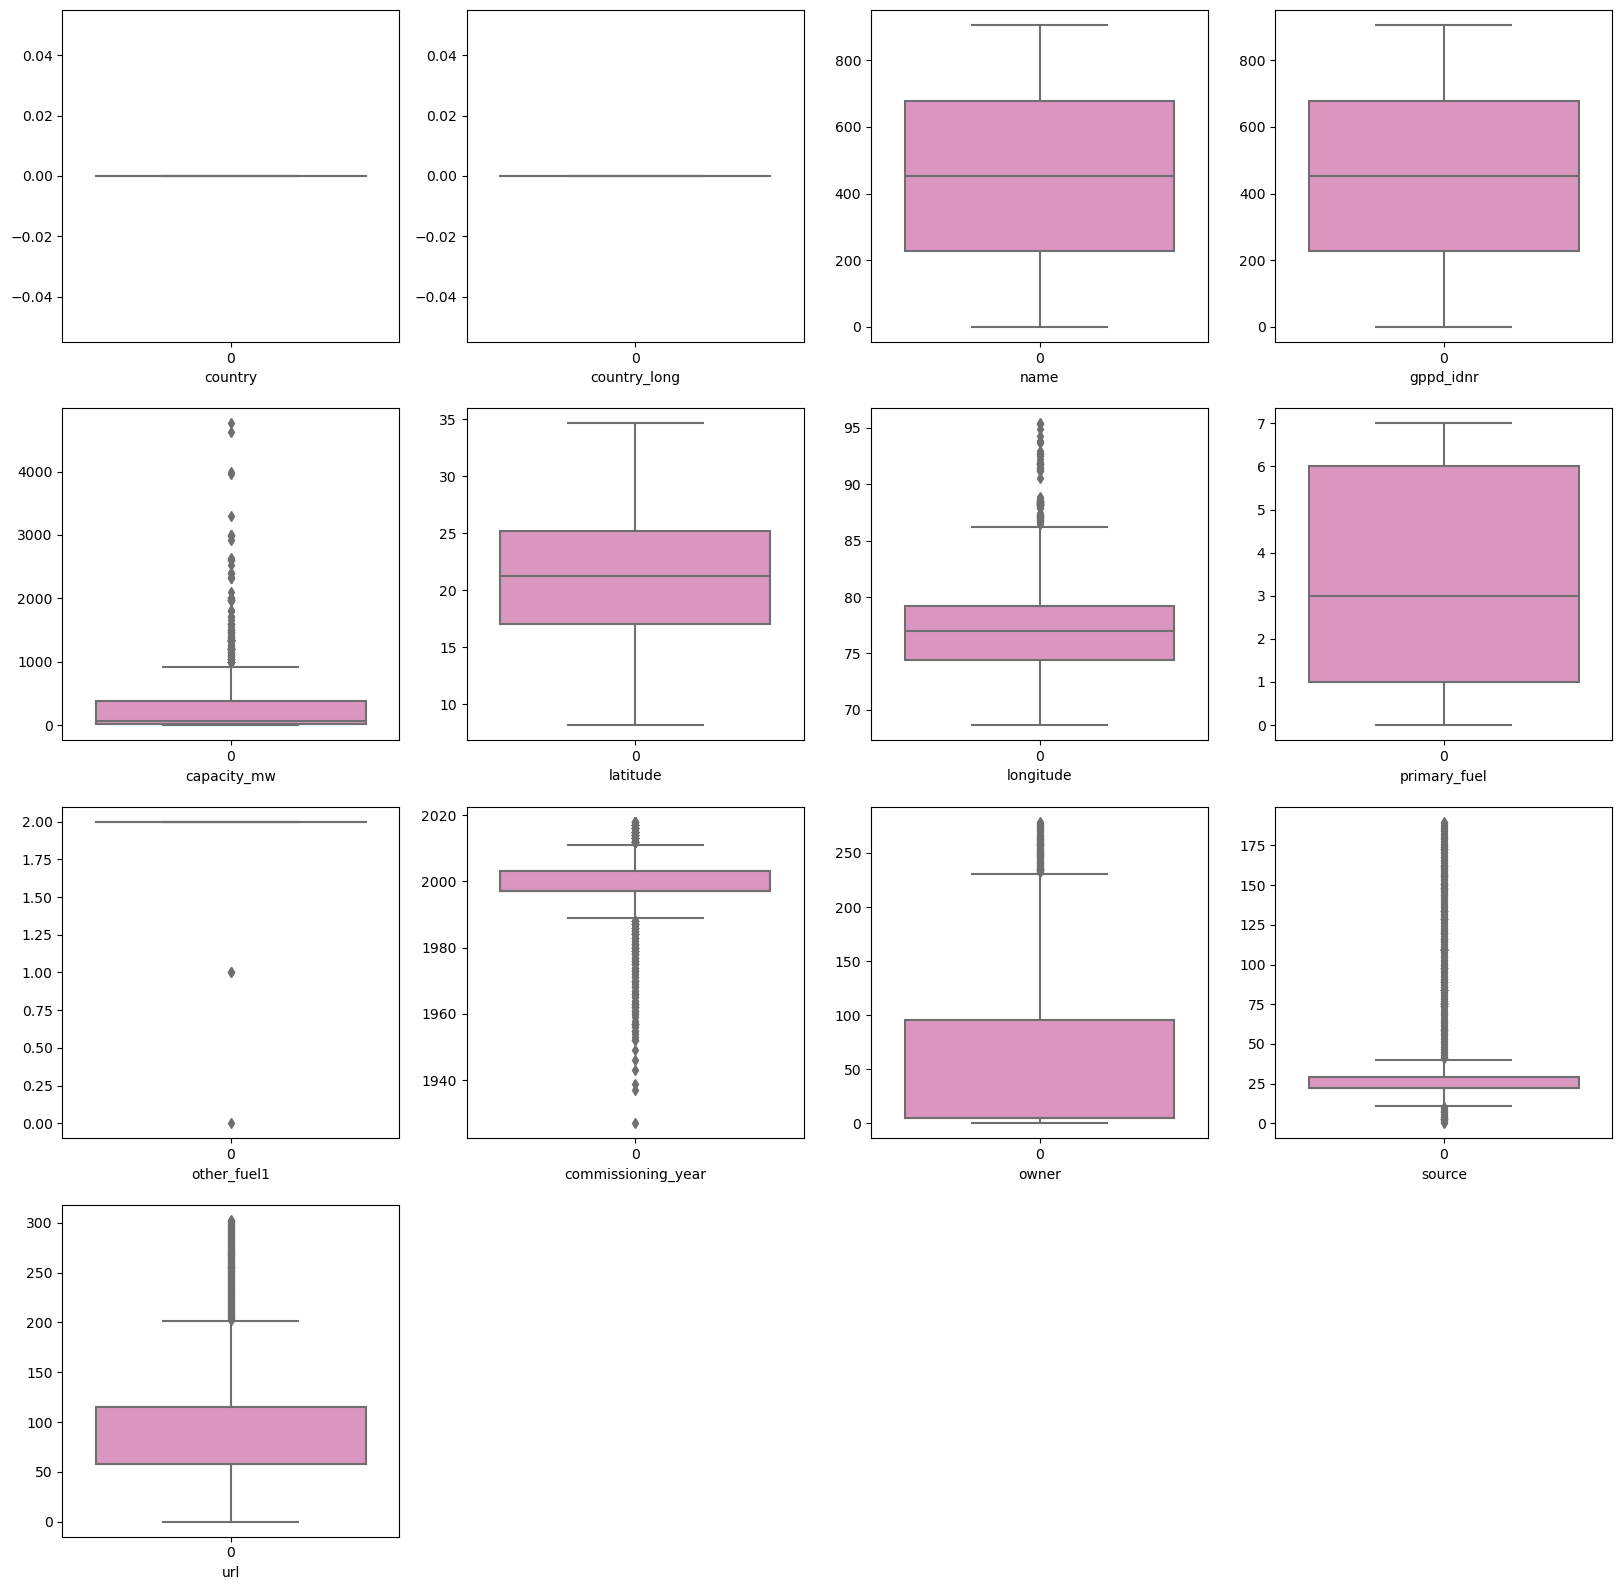

In [36]:
#Lets check the outliers by plotting boxplot

plt.figure(figsize = (20,25))
p=1
for i in df:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(df[i], palette = 'Set2_r')
        plt.xlabel(i)
        
    p+=1
plt.show()

In [38]:
capacity_mw_high = q3['capacity_mw'] + (1.5 * iqr['capacity_mw'])
print (capacity_mw_high)

938.0374999999999


In [39]:
#Check the indexes which have higher values
np_index = np.where(df['capacity_mw']>capacity_mw_high)
np_index

(array([  4,  10,  12,  15,  18,  44,  57,  61,  75,  78,  93, 143, 147,
        158, 162, 166, 167, 168, 189, 209, 279, 280, 281, 288, 297, 308,
        310, 315, 319, 324, 334, 350, 352, 359, 363, 364, 366, 368, 373,
        375, 378, 390, 391, 414, 417, 448, 449, 455, 468, 471, 472, 473,
        482, 493, 494, 525, 526, 532, 535, 544, 559, 565, 578, 579, 594,
        597, 618, 622, 623, 625, 626, 630, 632, 644, 645, 648, 654, 657,
        676, 678, 682, 691, 695, 697, 700, 707, 721, 723, 724, 726, 729,
        740, 743, 767, 786, 787, 788, 792, 799, 800, 808, 820, 821, 841,
        842, 845, 849, 867, 876, 880, 883, 889, 902], dtype=int64),)

In [40]:
df.skew()

country                    0.000000
country_long               0.000000
name                       0.000000
gppd_idnr                  0.000000
capacity_mw                3.123576
latitude                  -0.149698
longitude                  1.141881
primary_fuel               0.472251
other_fuel1              -20.453120
commissioning_year        -1.399359
owner                      1.364406
source                     1.827373
url                        1.510537
geolocation_source        -2.159841
year_of_capacity_data      0.000000
generation_gwh_2014        5.035446
generation_gwh_2015        5.364134
generation_gwh_2016        5.068427
generation_gwh_2017        5.110952
generation_gwh_2018        4.937907
generation_data_source     0.000000
dtype: float64

In [41]:
#Removing Skewness using Cuberoot method
df['capacity_mw'] = np.cbrt(df['capacity_mw'])

df['longitude'] = np.cbrt(df['longitude'])

df['generation_gwh_2014'] = np.cbrt(df['generation_gwh_2014'])

df['generation_gwh_2015'] = np.cbrt(df['generation_gwh_2015'])

df['generation_gwh_2016'] = np.cbrt(df['generation_gwh_2016'])

df['generation_gwh_2017'] = np.cbrt(df['generation_gwh_2017'])

df['generation_gwh_2018'] = np.cbrt(df['generation_gwh_2018'])

In [42]:
df.skew()

country                    0.000000
country_long               0.000000
name                       0.000000
gppd_idnr                  0.000000
capacity_mw                1.013378
latitude                  -0.149698
longitude                  1.002134
primary_fuel               0.472251
other_fuel1              -20.453120
commissioning_year        -1.399359
owner                      1.364406
source                     1.827373
url                        1.510537
geolocation_source        -2.159841
year_of_capacity_data      0.000000
generation_gwh_2014       -0.371187
generation_gwh_2015       -0.269579
generation_gwh_2016       -0.279323
generation_gwh_2017       -0.331857
generation_gwh_2018       -0.316915
generation_data_source     0.000000
dtype: float64

In [43]:
#Checking the correlation between features and the target
cor = df.corr()
cor

country  country_long      name  gppd_idnr  \
country                     NaN           NaN       NaN        NaN   
country_long                NaN           NaN       NaN        NaN   
name                        NaN           NaN  1.000000   0.332205   
gppd_idnr                   NaN           NaN  0.332205   1.000000   
capacity_mw                 NaN           NaN  0.032366  -0.508197   
latitude                    NaN           NaN -0.135247  -0.105728   
longitude                   NaN           NaN  0.021606  -0.382209   
primary_fuel                NaN           NaN  0.040753   0.609180   
other_fuel1                 NaN           NaN -0.074663   0.002333   
commissioning_year          NaN           NaN -0.043569   0.044059   
owner                       NaN           NaN  0.098075   0.630589   
source                      NaN           NaN -0.014640   0.416384   
url                         NaN           NaN  0.041917   0.597080   
geolocation_source          NaN           NaN  0.036225  -0.464174   
year_of_capacity_data       NaN           NaN       NaN        NaN   
generation_gwh_2014         NaN           NaN  0.062720   0.282659   
generation_gwh_2015         NaN           NaN  0.043853   0.287099   
generation_gwh_2016         NaN           NaN  0.039647   0.267341   
generation_gwh_2017         NaN           NaN  0.054809   0.254791   
generation_gwh_2018         NaN           NaN  0.038173   0.252307   
generation_data_source      NaN           NaN       NaN        NaN   

                        capacity_mw  latitude  longitude  primary_fuel  \
country                         NaN       NaN        NaN           NaN   
country_long                    NaN       NaN        NaN           NaN   
name                       0.032366 -0.135247   0.021606      0.040753   
gppd_idnr                 -0.508197 -0.105728  -0.382209      0.609180   
capacity_mw                1.000000  0.071297   0.287408     -0.500583   
latitude                   0.071297  1.000000   0.028427     -0.010204   
longitude                  0.287408  0.028427   1.000000     -0.354780   
primary_fuel              -0.500583 -0.010204  -0.354780      1.000000   
other_fuel1               -0.024193  0.036695   0.030375      0.004912   
commissioning_year         0.294680  0.102069   0.091163     -0.126650   
owner                     -0.449885 -0.071182  -0.303608      0.284296   
source                    -0.355100  0.055927  -0.241702      0.053613   
url                       -0.332217 -0.131038  -0.307054      0.589886   
geolocation_source         0.357340 -0.184275   0.258470     -0.483217   
year_of_capacity_data           NaN       NaN        NaN           NaN   
generation_gwh_2014        0.217743  0.065087  -0.093962      0.013619   
generation_gwh_2015        0.218317  0.056067  -0.103987      0.016153   
generation_gwh_2016        0.247026  0.072445  -0.063947      0.004585   
generation_gwh_2017        0.251861  0.047354  -0.083297      0.015603   
generation_gwh_2018        0.249290  0.053991  -0.081274      0.011025   
generation_data_source          NaN       NaN        NaN           NaN   

                        other_fuel1  commissioning_year  ...    source  \
country                         NaN                 NaN  ...       NaN   
country_long                    NaN                 NaN  ...       NaN   
name                      -0.074663           -0.043569  ... -0.014640   
gppd_idnr                  0.002333            0.044059  ...  0.416384   
capacity_mw               -0.024193            0.294680  ... -0.355100   
latitude                   0.036695            0.102069  ...  0.055927   
longitude                  0.030375            0.091163  ... -0.241702   
primary_fuel               0.004912           -0.126650  ...  0.053613   
other_fuel1                1.000000            0.036904  ...  0.026590   
commissioning_year         0.036904            1.000000  ...  0.021528   
owner                      0.033687     

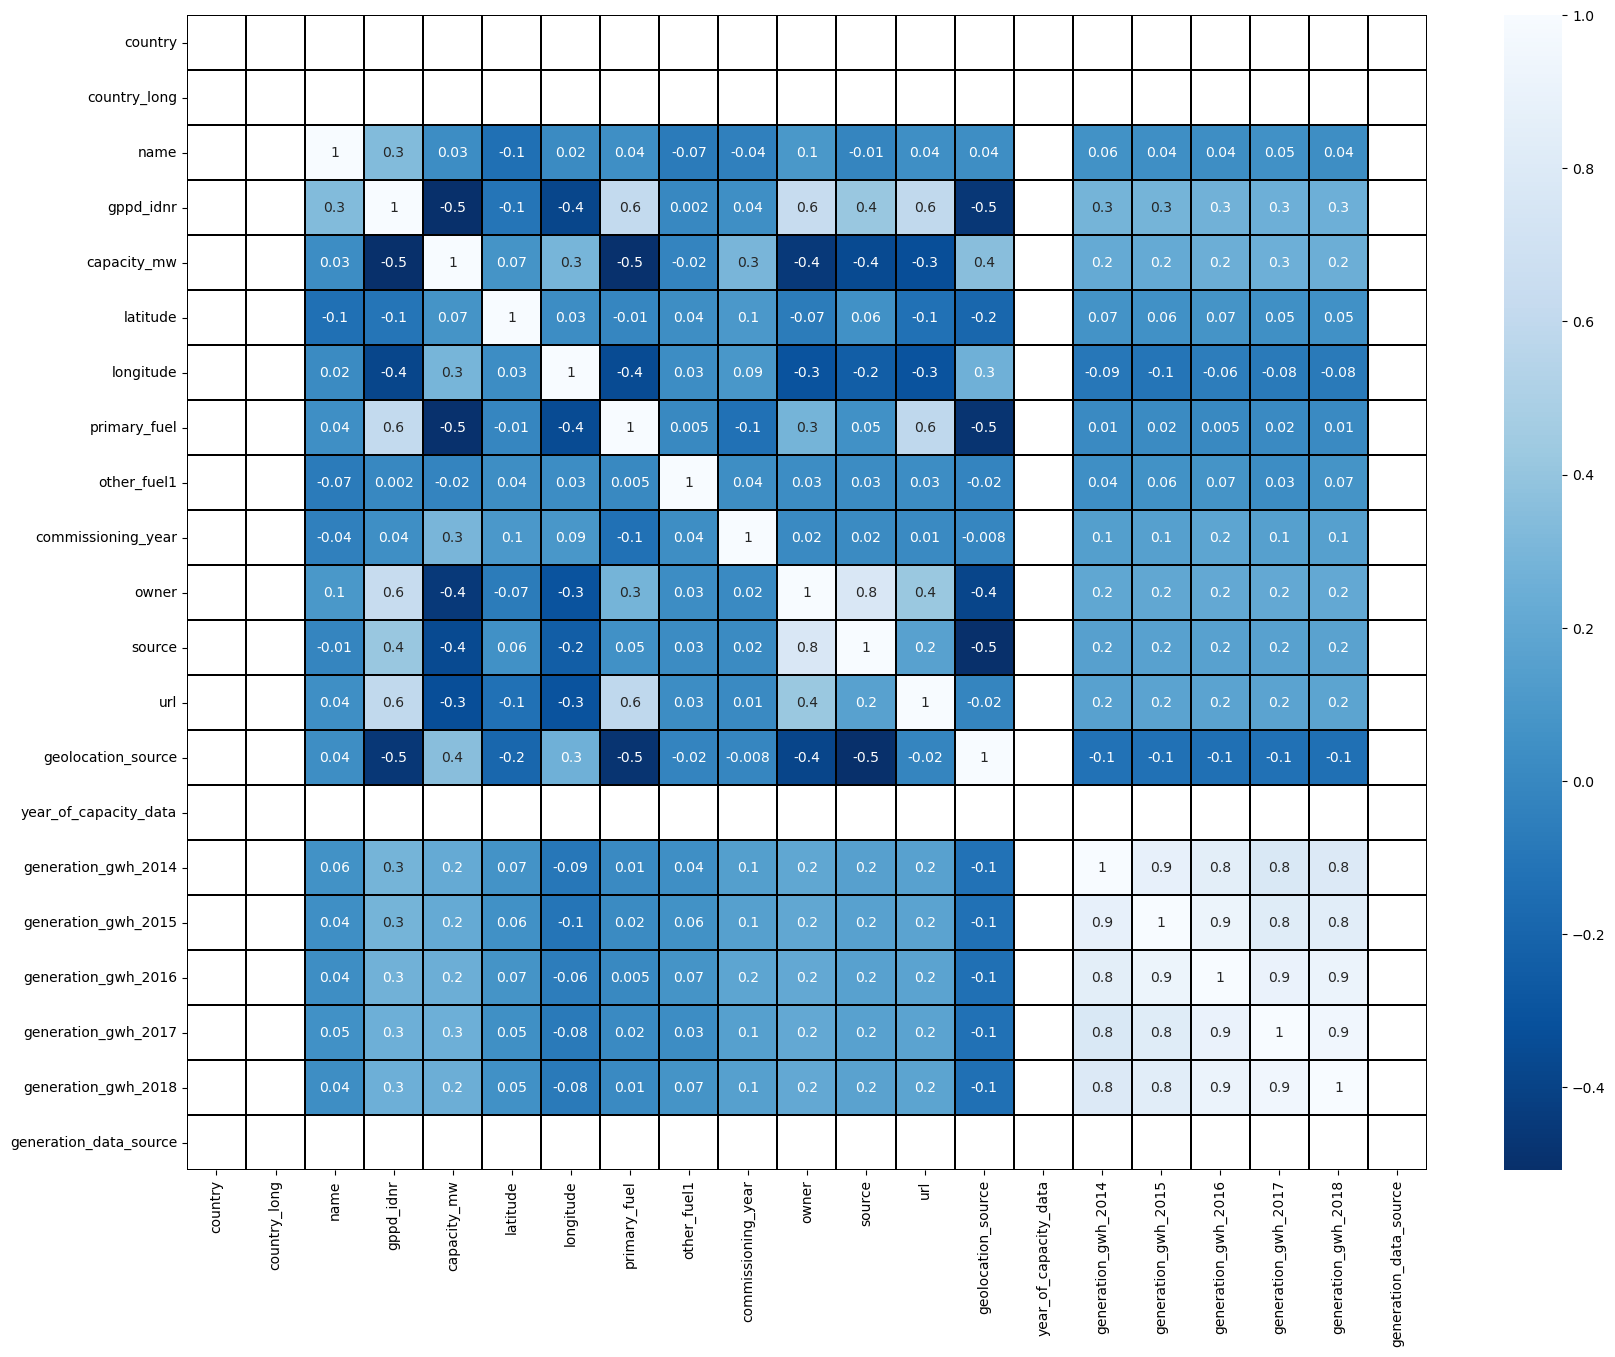

In [44]:
#Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), linewidths = 0.1, fmt = '.1g', linecolor = 'black', annot = True, cmap = 'Blues_r')
plt.yticks(rotation = 0);
plt.show()

In [45]:
cor['primary_fuel'].sort_values(ascending = False)

primary_fuel              1.000000
gppd_idnr                 0.609180
url                       0.589886
owner                     0.284296
source                    0.053613
name                      0.040753
generation_gwh_2015       0.016153
generation_gwh_2017       0.015603
generation_gwh_2014       0.013619
generation_gwh_2018       0.011025
other_fuel1               0.004912
generation_gwh_2016       0.004585
latitude                 -0.010204
commissioning_year       -0.126650
longitude                -0.354780
geolocation_source       -0.483217
capacity_mw              -0.500583
country                        NaN
country_long                   NaN
year_of_capacity_data          NaN
generation_data_source         NaN
Name: primary_fuel, dtype: float64

In [46]:
#Seperate features and label
x = df.drop("primary_fuel", axis=1)
y = df["primary_fuel"]

In [47]:
#Feature Scaling using Standard Scalarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

country  country_long      name  gppd_idnr  capacity_mw  latitude  \
0        0.0           0.0 -1.730142   0.779137    -1.126096  1.149805   
1        0.0           0.0 -1.726323   0.252074    -0.132660  0.587311   
2        0.0           0.0 -1.722504   1.527719    -0.503206  0.116179   
3        0.0           0.0 -1.718684  -1.730142     0.025977  0.439989   
4        0.0           0.0 -1.714865  -1.726323     2.174090  0.125479   
..       ...           ...       ...        ...          ...       ...   
902      0.0           0.0  1.714865   0.145133     2.031075 -0.806975   
903      0.0           0.0  1.718684   1.409321    -1.100127 -1.366853   
904      0.0           0.0  1.722504   1.672853    -0.641727 -0.974707   
905      0.0           0.0  1.726323   0.328460    -0.224749  0.518793   
906      0.0           0.0  1.730142   1.615563    -0.763130 -1.853834   

     longitude  other_fuel1  commissioning_year     owner    source       url  \
0    -0.892687     0.054303        1.069162e+00  2.095328  1.460215  0.476673   
1    -0.593158     0.054303       -1.747794e-14  2.446913  2.917019  1.116401   
2    -1.760007     0.054303       -1.747794e-14 -0.656734 -0.512075  1.571318   
3     2.808168     0.054303        5.310801e-01 -0.620363 -0.489662 -0.518459   
4     1.047925     0.054303        1.376637e+00 -0.620363 -0.489662 -0.518459   
..         ...          ...                 ...       ...       ...       ...   
902  -0.002532     0.054303        1.453505e+00 -0.620363 -0.489662 -0.518459   
903   0.168603     0.054303       -1.747794e-14  0.701112  0.743019 -1.030242   
904  -0.382577     0.054303       -1.747794e-14 -0.620363 -0.512075  2.353208   
905  -0.781270     0.054303       -1.747794e-14  0.422268  0.339596 -0.177271   
906   0.022940     0.054303       -1.747794e-14  2.701509 -0.512075  2.139965   

     geolocation_source  year_of_capacity_data  generation_gwh_2014  \
0             -1.083349                    0.0             0.311080   
1              0.394241                    0.0             0.311080   
2              0.394241                    0.0             0.311080   
3              0.394241                    0.0            -0.810291   
4              0.394241                    0.0             0.545707   
..                  ...                    ...                  ...   
902            0.394241                    0.0             0.311080   
903           -2.560940                    0.0             0.311080   
904            0.394241                    0.0             0.311080   
905            0.394241                    0.0             0.311080   
906            0.394241                    0.0             0.311080   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0               0.329243             0.332664             0.332256   
1               0.329243             0.332664             0.332256   
2               0.329243             0.332664             0.332256   
3              -0.537332            -0.501019            -0.702510   
4               1.337780             1.377524             1.143851   
..                   ...                  ...                  ...   
902            -2.372090            -1.235889            -0.533420   
903             0.329243             0.332664             0.332256   
904             0.329243             0.332664             0.332256   
905             0.329243             0.332664             0.332256   
906             0.329243             0.332664             0.332256   

     generation_gwh_2018  generation_data_source  
0               0.338536                     0.0  
1               0.338536                     0.0  
2               0.338536                     0.0  
3              -0.724252                     0.0  
4               1.489566                     0.0  
..                   ...                     ...  
902            -0.669837                     0.0  
903             0.338536                 

In [48]:
#Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"] = x.columns

In [49]:
vif

VIF values                Features
0          NaN                 country
1          NaN            country_long
2     1.486846                    name
3     4.628693               gppd_idnr
4     2.408795             capacity_mw
5     1.123066                latitude
6     1.264582               longitude
7     1.034152             other_fuel1
8     1.245050      commissioning_year
9     3.804374                   owner
10    3.111731                  source
11    2.083272                     url
12    2.026803      geolocation_source
13         NaN   year_of_capacity_data
14    4.543271     generation_gwh_2014
15    8.248981     generation_gwh_2015
16   12.279810     generation_gwh_2016
17   10.322240     generation_gwh_2017
18   11.322807     generation_gwh_2018
19         NaN  generation_data_source

In [50]:
#Dropping TotalCharges column
x.drop("generation_gwh_2016", axis=1, inplace=True)

In [51]:
#Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"] = x.columns

In [52]:
vif

VIF values                Features
0          NaN                 country
1          NaN            country_long
2     1.486724                    name
3     4.628614               gppd_idnr
4     2.408787             capacity_mw
5     1.120437                latitude
6     1.253179               longitude
7     1.032565             other_fuel1
8     1.233685      commissioning_year
9     3.803472                   owner
10    3.111563                  source
11    2.082310                     url
12    2.026624      geolocation_source
13         NaN   year_of_capacity_data
14    4.519233     generation_gwh_2014
15    5.588216     generation_gwh_2015
16    9.619711     generation_gwh_2017
17   10.525090     generation_gwh_2018
18         NaN  generation_data_source

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 30, random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is", maxAccu, "at random_state", maxRS)

Best accuracy is 1.0 at random_state 54


In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=30, random_state=maxRS)

In [56]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [57]:
#Checking accuracy for RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

1.0
[[ 3  0  0  0  0]
 [ 0  9  0  0  0]
 [ 0  0 13  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  0  4]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         3
         1.0       1.00      1.00      1.00         9
         3.0       1.00      1.00      1.00        13
         6.0       1.00      1.00      1.00         1
         7.0       1.00      1.00      1.00         4

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [58]:
#Checking accuracy for LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.9666666666666667
[[ 3  0  0  0  0]
 [ 0  8  1  0  0]
 [ 0  0 13  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  0  4]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         3
         1.0       1.00      0.89      0.94         9
         3.0       0.93      1.00      0.96        13
         6.0       1.00      1.00      1.00         1
         7.0       1.00      1.00      1.00         4

    accuracy                           0.97        30
   macro avg       0.99      0.98      0.98        30
weighted avg       0.97      0.97      0.97        30



In [59]:
#Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.9666666666666667
[[ 3  0  0  0  0]
 [ 0  8  1  0  0]
 [ 0  0 13  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  0  4]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         3
         1.0       1.00      0.89      0.94         9
         3.0       0.93      1.00      0.96        13
         6.0       1.00      1.00      1.00         1
         7.0       1.00      1.00      1.00         4

    accuracy                           0.97        30
   macro avg       0.99      0.98      0.98        30
weighted avg       0.97      0.97      0.97        30



In [60]:
#Check accuracy for GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predGB))

0.9666666666666667
[[ 3  0  0  0  0]
 [ 0  8  1  0  0]
 [ 0  0 13  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  0  4]]
              precision    recall  f1-score   support

         0.0       1.00      0.67      0.80         3
         1.0       0.90      1.00      0.95         9
         3.0       1.00      1.00      1.00        13
         6.0       1.00      1.00      1.00         1
         7.0       1.00      1.00      1.00         4

    accuracy                           0.97        30
   macro avg       0.98      0.93      0.95        30
weighted avg       0.97      0.97      0.96        30



In [72]:
#Check accuracy for AdaBoostClassifier
Ada = AdaBoostClassifier()
Ada.fit(x_train,y_train)
predada = Ada.predict(x_test)
print(accuracy_score(y_test, predada))
print(confusion_matrix(y_test, predada))
print(classification_report(y_test, predada))

0.4666666666666667
[[ 0  3  0  0  0]
 [ 0  9  0  0  0]
 [ 0 13  0  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  0  4]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.36      1.00      0.53         9
         3.0       0.00      0.00      0.00        13
         6.0       1.00      1.00      1.00         1
         7.0       1.00      1.00      1.00         4

    accuracy                           0.47        30
   macro avg       0.47      0.60      0.51        30
weighted avg       0.27      0.47      0.33        30



In [73]:
#Check accuracy for ExtraTreesClassifier
Etc = ExtraTreesClassifier()
Etc.fit(x_train,y_train)
predetc = Etc.predict(x_test)
print(accuracy_score(y_test, predetc))
print(confusion_matrix(y_test, predetc))
print(classification_report(y_test, predetc))

1.0
[[ 3  0  0  0  0]
 [ 0  9  0  0  0]
 [ 0  0 13  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0  0  4]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         3
         1.0       1.00      1.00      1.00         9
         3.0       1.00      1.00      1.00        13
         6.0       1.00      1.00      1.00         1
         7.0       1.00      1.00      1.00         4

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
#Checking cv score for Random Forest Classifier
score = cross_val_score(RFC, x, y)
print(score)
print(score.mean())
print('Difference between Accuracy score and Cross Validation score is -', accuracy_score(y_test, predRFC) - score.mean())

[0.85164835 0.85714286 0.8839779  0.83977901 0.84530387]
0.8555703964543742
Difference between Accuracy score and Cross Validation score is - 0.14442960354562584


In [68]:
#Checking cv score for Logistic Regression Classifier
score1 = cross_val_score(LR, x, y)
print(score1)
print(score1.mean())
print('Difference between Accuracy score and Cross Validation score is -', accuracy_score(y_test, predLR) - score1.mean())

[0.7967033  0.8021978  0.80110497 0.77900552 0.76243094]
0.7882885070730375
Difference between Accuracy score and Cross Validation score is - 0.17837815959362913


In [69]:
#Checking cv score for Support Vector Machine
score2 = cross_val_score(svc, x, y)
print(score2)
print(score2.mean())
print('Difference between Accuracy score and Cross Validation score is -', accuracy_score(y_test, predsvc) - score2.mean())

[0.8021978  0.80769231 0.79558011 0.80662983 0.81767956]
0.8059559225305082
Difference between Accuracy score and Cross Validation score is - 0.1607107441361585


In [70]:
#Checking cv score for Gradient Boost Classifier
score3 = cross_val_score(GB, x, y)
print(score3)
print(score3.mean())
print('Difference between Accuracy score and Cross Validation score is -', accuracy_score(y_test, predGB) - score3.mean())

[0.83516484 0.8956044  0.90607735 0.82872928 0.87845304]
0.8688057798555036
Difference between Accuracy score and Cross Validation score is - 0.09786088681116312


In [74]:
#Checking cv score for Ada Boost Classifier
score4 = cross_val_score(Ada, x, y)
print(score4)
print(score4.mean())
print('Difference between Accuracy score and Cross Validation score is -', accuracy_score(y_test, predada) - score4.mean())

[0.3956044  0.64835165 0.54143646 0.65745856 0.56906077]
0.5623823690122032
Difference between Accuracy score and Cross Validation score is - -0.0957157023455365


In [75]:
#Checking cv score for Extra Trees Classifier
score5 = cross_val_score(Etc, x, y)
print(score5)
print(score5.mean())
print('Difference between Accuracy score and Cross Validation score is -', accuracy_score(y_test, predetc) - score5.mean())

[0.82417582 0.84065934 0.89502762 0.83977901 0.83977901]
0.8478841600388561
Difference between Accuracy score and Cross Validation score is - 0.15211583996114386


# Hyperparameter Tuning

In [63]:
#Random Forest Classifier
from sklearn.model_selection import GridSearchCV

parameters = {'criterion' : ['gini', 'entropy'],
             'random_state' : [10, 50, 1000],
             'max_depth' : [0, 10, 20],
             'n_jobs' : [-2, -1, 1],
             'n_estimators': [50, 100, 200, 300]}

In [64]:
GCV = GridSearchCV(RandomForestClassifier(), parameters, cv=5)

In [65]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [66]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 10}

In [67]:
Final_model = RandomForestClassifier(criterion = 'entropy', max_depth = 20, n_estimators = 200, n_jobs = -2, random_state = 10)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

100.0


In [76]:
#Saving the model
#Saving the model using .pk1
import joblib
joblib.dump(Final_model, "GlobalPowerPlantbase_Classification.pk1")

['GlobalPowerPlantbase_Classification.pk1']

In [77]:
#Lets load the saved model and get the predictions
model = joblib.load('GlobalPowerPlantbase_Classification.pk1')

#Prediction
prediction = model.predict(x_test)
prediction

array([3., 7., 1., 1., 1., 7., 7., 0., 1., 3., 3., 3., 3., 3., 3., 1., 1.,
       7., 3., 1., 3., 3., 3., 0., 6., 1., 3., 3., 1., 0.])

In [80]:
a = np.array(y_test)
df=pd.DataFrame()
df['Predicted'] = prediction
df['Original'] = a
df

Predicted  Original
0         3.0       3.0
1         7.0       7.0
2         1.0       1.0
3         1.0       1.0
4         1.0       1.0
5         7.0       7.0
6         7.0       7.0
7         0.0       0.0
8         1.0       1.0
9         3.0       3.0
10        3.0       3.0
11        3.0       3.0
12        3.0       3.0
13        3.0       3.0
14        3.0       3.0
15        1.0       1.0
16        1.0       1.0
17        7.0       7.0
18        3.0       3.0
19        1.0       1.0
20        3.0       3.0
21        3.0       3.0
22        3.0       3.0
23        0.0       0.0
24        6.0       6.0
25        1.0       1.0
26        3.0       3.0
27        3.0       3.0
28        1.0       1.0
29        0.0       0.0

# Regression Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Dataset
df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0    ...                    NaN                  NaN                 NaN   
1    ...                    NaN                  NaN                 NaN   
2    ...                    NaN                  NaN                 NaN   
3    ...                 2019.0                  NaN          617.789264   
4    ...                 2019.0                  NaN         3035.550000   
..   ...                    ...                  ...                 ...   
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN                  NaN                 NaN   
904  ...                    NaN                  NaN                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3            843.747000          886.004428          663.774500   
4           5916.370000         6243.000000         5385.579736   
..                  ...                 ...                 ...   
902            0.994875          233.596650          865.400000   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                    NaN                  NaN                            NaN   
1                    NaN                  NaN                            NaN   
2                    NaN                  NaN                            NaN   
3             626.239128                  NaN  Central Electricity Authority   
4            7279.000000                  NaN  Central Electricity Authority   
..                   ...    

In [3]:
df.shape

(907, 27)

In [4]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [5]:
#Checking the columns of dataset
df.columns.tolist()

['country',
 'country_long',
 'name',
 'gppd_idnr',
 'capacity_mw',
 'latitude',
 'longitude',
 'primary_fuel',
 'other_fuel1',
 'other_fuel2',
 'other_fuel3',
 'commissioning_year',
 'owner',
 'source',
 'url',
 'geolocation_source',
 'wepp_id',
 'year_of_capacity_data',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_gwh_2019',
 'generation_data_source',
 'estimated_generation_gwh']

In [6]:
#checking the null values
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [7]:
#Dropping the columns with no values
df = df.drop(['other_fuel3', 'wepp_id', 'generation_gwh_2013', 'generation_gwh_2019', 'estimated_generation_gwh', 
              'other_fuel2' ], axis=1)

In [8]:
#checking the null values
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [9]:
#Fill the null values
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())

df['longitude'] = df['longitude'].fillna(df['longitude'].mean())

df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

df['other_fuel1'] = df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])

df['commissioning_year'] = df['commissioning_year'].fillna(df['commissioning_year'].mean())

df['owner'] = df['owner'].fillna(df['owner'].mode()[0])

df['year_of_capacity_data'] = df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].mode()[0])

df['generation_gwh_2014'] = df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean())

df['generation_gwh_2015'] = df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())

df['generation_gwh_2016'] = df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean())

df['generation_gwh_2017'] = df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean())

df['generation_gwh_2018'] = df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].mean())

df['generation_data_source'] = df['generation_data_source'].fillna(df['generation_data_source'].mode()[0])

In [10]:
#checking the null values
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

In [11]:
#Seperating Numerical and Categorical columns

#Checking for Categorical columns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
print("Categorical Columns:", categorical_col)
print("\n")

#Checking for Numerical columns
numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]!= 'object':
        numerical_col.append(i)
print("Numerical Columns: ", numerical_col)

Categorical Columns: ['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'other_fuel1', 'owner', 'source', 'url', 'geolocation_source', 'generation_data_source']


Numerical Columns:  ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']


In [12]:
#Checking number of unique values in each column
df.nunique().to_frame('No. of unique values')

No. of unique values
country                                    1
country_long                               1
name                                     907
gppd_idnr                                907
capacity_mw                              361
latitude                                 837
longitude                                828
primary_fuel                               8
other_fuel1                                3
commissioning_year                        74
owner                                    280
source                                   191
url                                      304
geolocation_source                         3
year_of_capacity_data                      1
generation_gwh_2014                      372
generation_gwh_2015                      397
generation_gwh_2016                      404
generation_gwh_2017                      409
generation_gwh_2018                      411
generation_data_source                     1

In [13]:
df.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1  commissioning_year  ...  \
0   28.1839    73.2407        Solar         Oil         2011.000000  ...   
1   24.7663    74.6090         Coal         Oil         1997.091082  ...   
2   21.9038    69.3732         Wind         Oil         1997.091082  ...   
3   23.8712    91.3602          Gas         Oil         2004.000000  ...   
4   21.9603    82.4091         Coal         Oil         2015.000000  ...   

                                 source  \
0  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd   
2                                   CDM   
3         Central Electricity Authority   
4         Central Electricity Authority   

                                                 url  \
0  http://www.nrel.gov/csp/solarpaces/project_det...   
1                    http://www.ultratechcement.com/   
2  https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                             http://www.cea.nic.in/   
4                             http://www.cea.nic.in/   

                     geolocation_source year_of_capacity_data  \
0  National Renewable Energy Laboratory                2019.0   
1                                   WRI                2019.0   
2                                   WRI                2019.0   
3                                   WRI                2019.0   
4                                   WRI                2019.0   

   generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0          2431.823590          2428.226946          2467.936859   
1          2431.823590          2428.226946          2467.936859   
2          2431.823590          2428.226946          2467.936859   
3           617.789264           843.747000           886.004428   
4          3035.550000          5916.370000          6243.000000   

   generation_gwh_2017  generation_gwh_2018         generation_data_source  
0          2547.759305          2600.804099  Central Electricity Authority  
1          2547.759305          2600.804099  Central Electricity Authority  
2          2547.759305          2600.804099  Central Electricity Authority  
3           663.774500           626.239128  Central Electricity Authority  
4          5385.579736          7279.000000  Central Electricity Authority  

[5 rows x 21 columns]

In [14]:
#Statistical summary of new columns
df.describe()

capacity_mw    latitude   longitude  commissioning_year  \
count   907.000000  907.000000  907.000000          907.000000   
mean    326.223755   21.197918   77.464907         1997.091082   
std     590.085456    6.079148    4.812291           13.016360   
min       0.000000    8.168900   68.644700         1927.000000   
25%      16.725000   17.072000   74.388900         1997.091082   
50%      59.200000   21.281800   76.979200         1997.091082   
75%     385.250000   25.176450   79.206100         2003.000000   
max    4760.000000   34.649000   95.408000         2018.000000   

       year_of_capacity_data  generation_gwh_2014  generation_gwh_2015  \
count                  907.0           907.000000           907.000000   
mean                  2019.0          2431.823590          2428.226946   
std                      0.0          2665.338608          2859.349132   
min                   2019.0             0.000000             0.000000   
25%                   2019.0          1211.362750           916.000000   
50%                   2019.0          2431.823590          2428.226946   
75%                   2019.0          2431.823590          2428.226946   
max                   2019.0         28127.000000         30539.000000   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
count           907.000000           907.000000           907.000000  
mean           2467.936859          2547.759305          2600.804099  
std            2877.890004          2921.502193          3030.808041  
min               0.000000             0.000000             0.000000  
25%             896.500214           882.594850           824.842340  
50%            2467.936859          2547.759305          2600.804099  
75%            2467.936859          2547.759305          2600.804099  
max           30015.000000         35116.000000         35136.000000

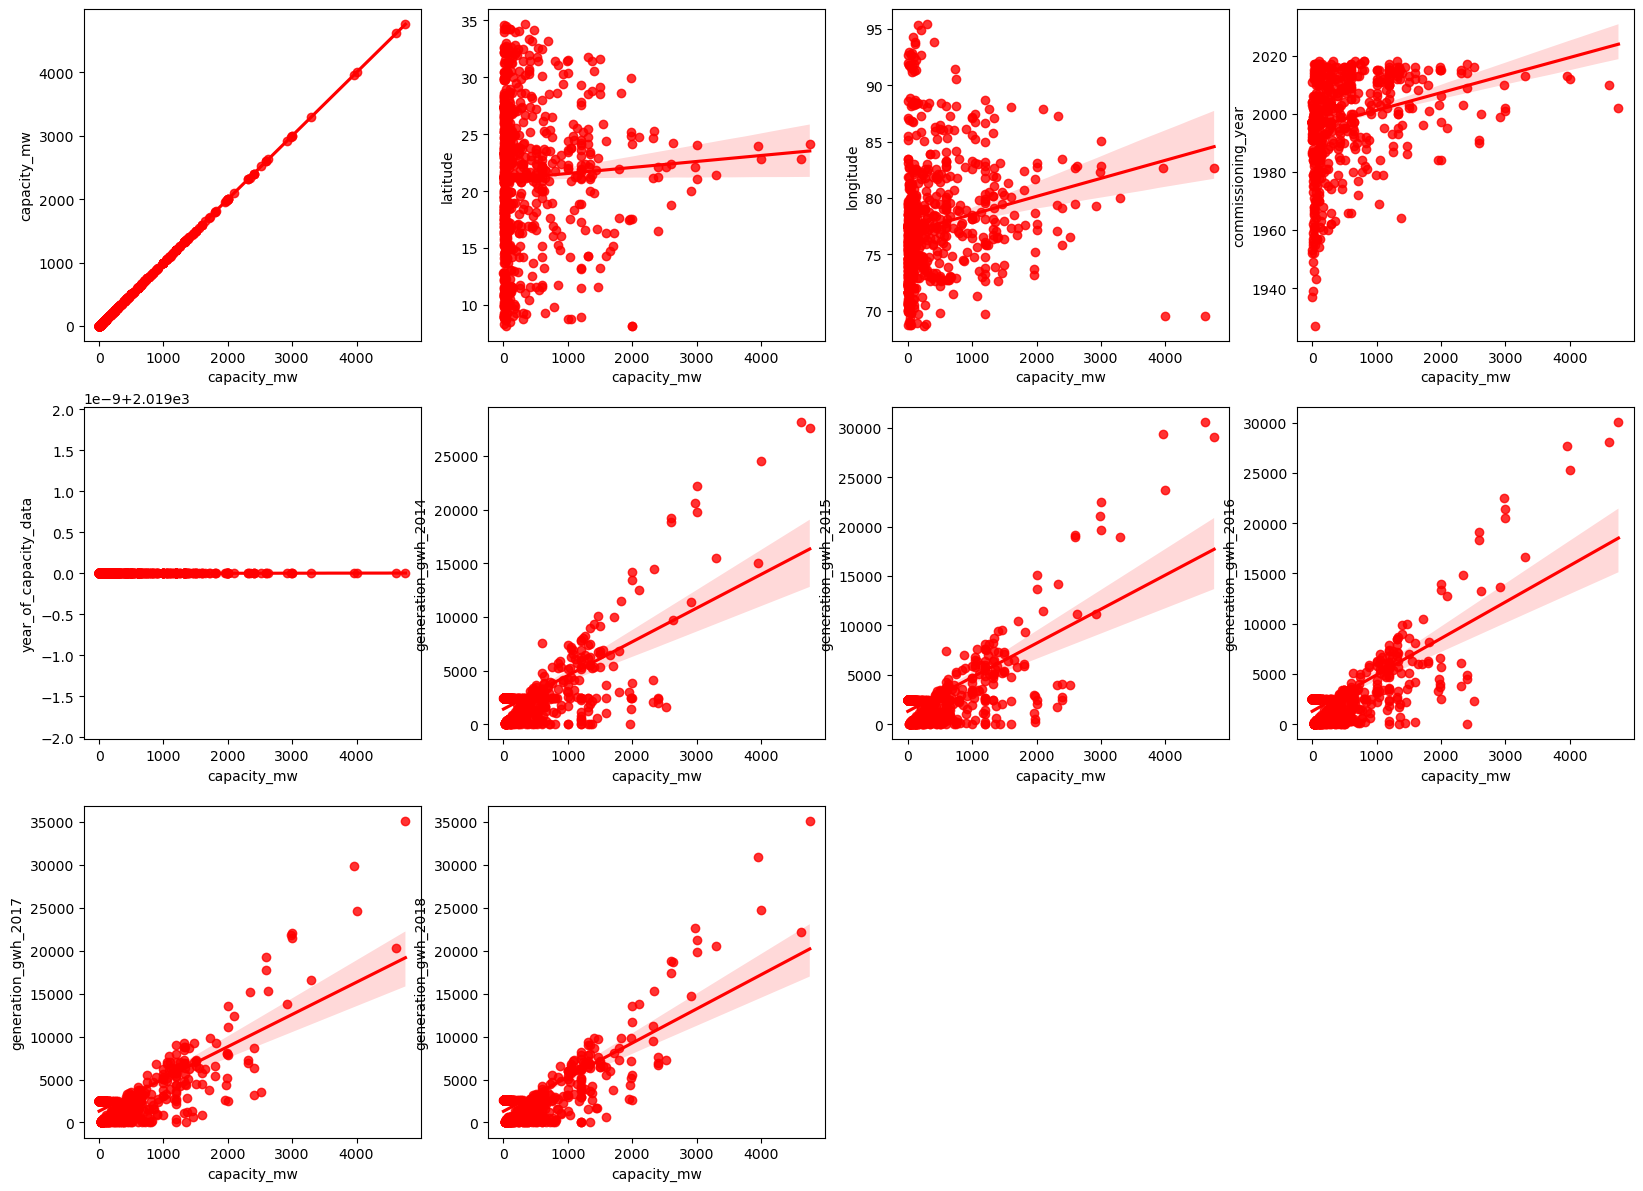

In [15]:
plt.figure(figsize = (20,25))
p=1
for i in numerical_col:
    if p<=17:
        plt.subplot(5,4,p)
        sns.regplot(x='capacity_mw', y=i, data=df, color='r')
        plt.xlabel('capacity_mw')
        plt.ylabel(i)
    p+=1
    
plt.show()

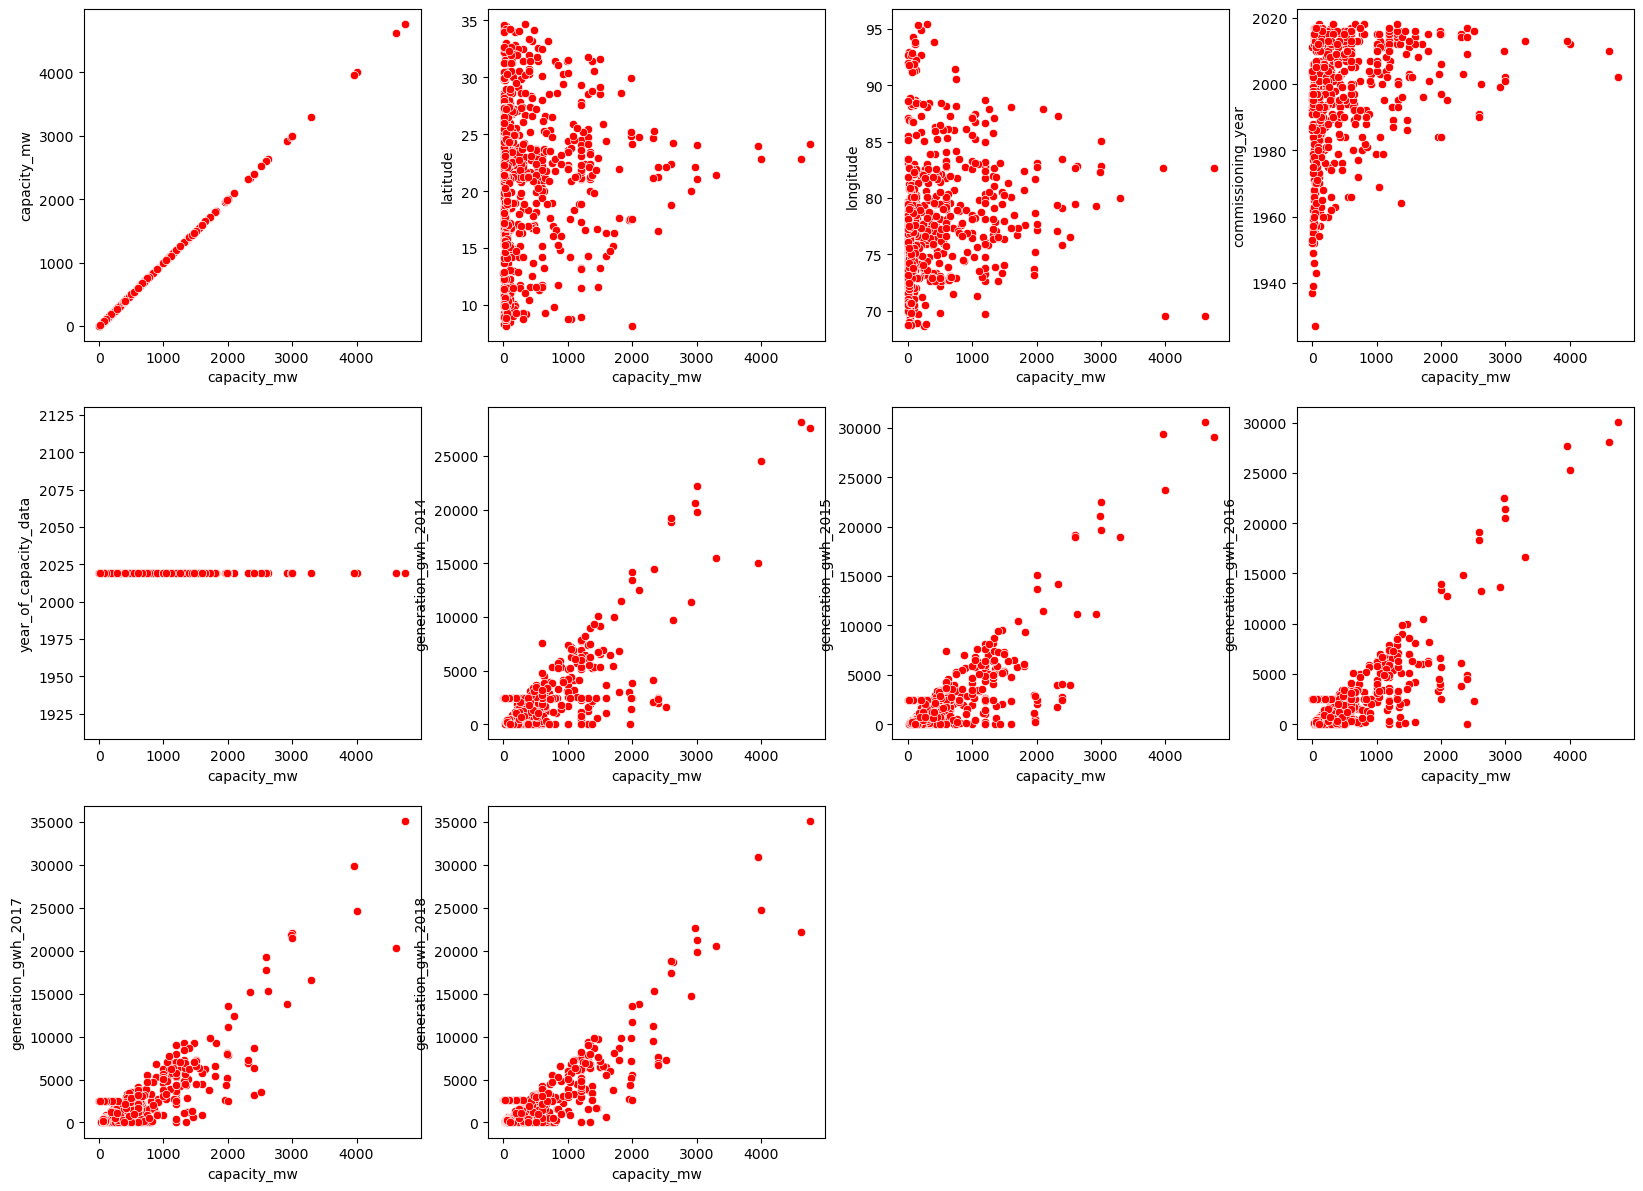

In [16]:
plt.figure(figsize=(20,25))
p=1
for i in numerical_col:
    if p<=17:
        plt.subplot(5,4,p)
        sns.scatterplot(x='capacity_mw', y=i, data=df, color='r')
        plt.xlabel('capacity_mw')
        plt.ylabel(i)
    p+=1
plt.show()

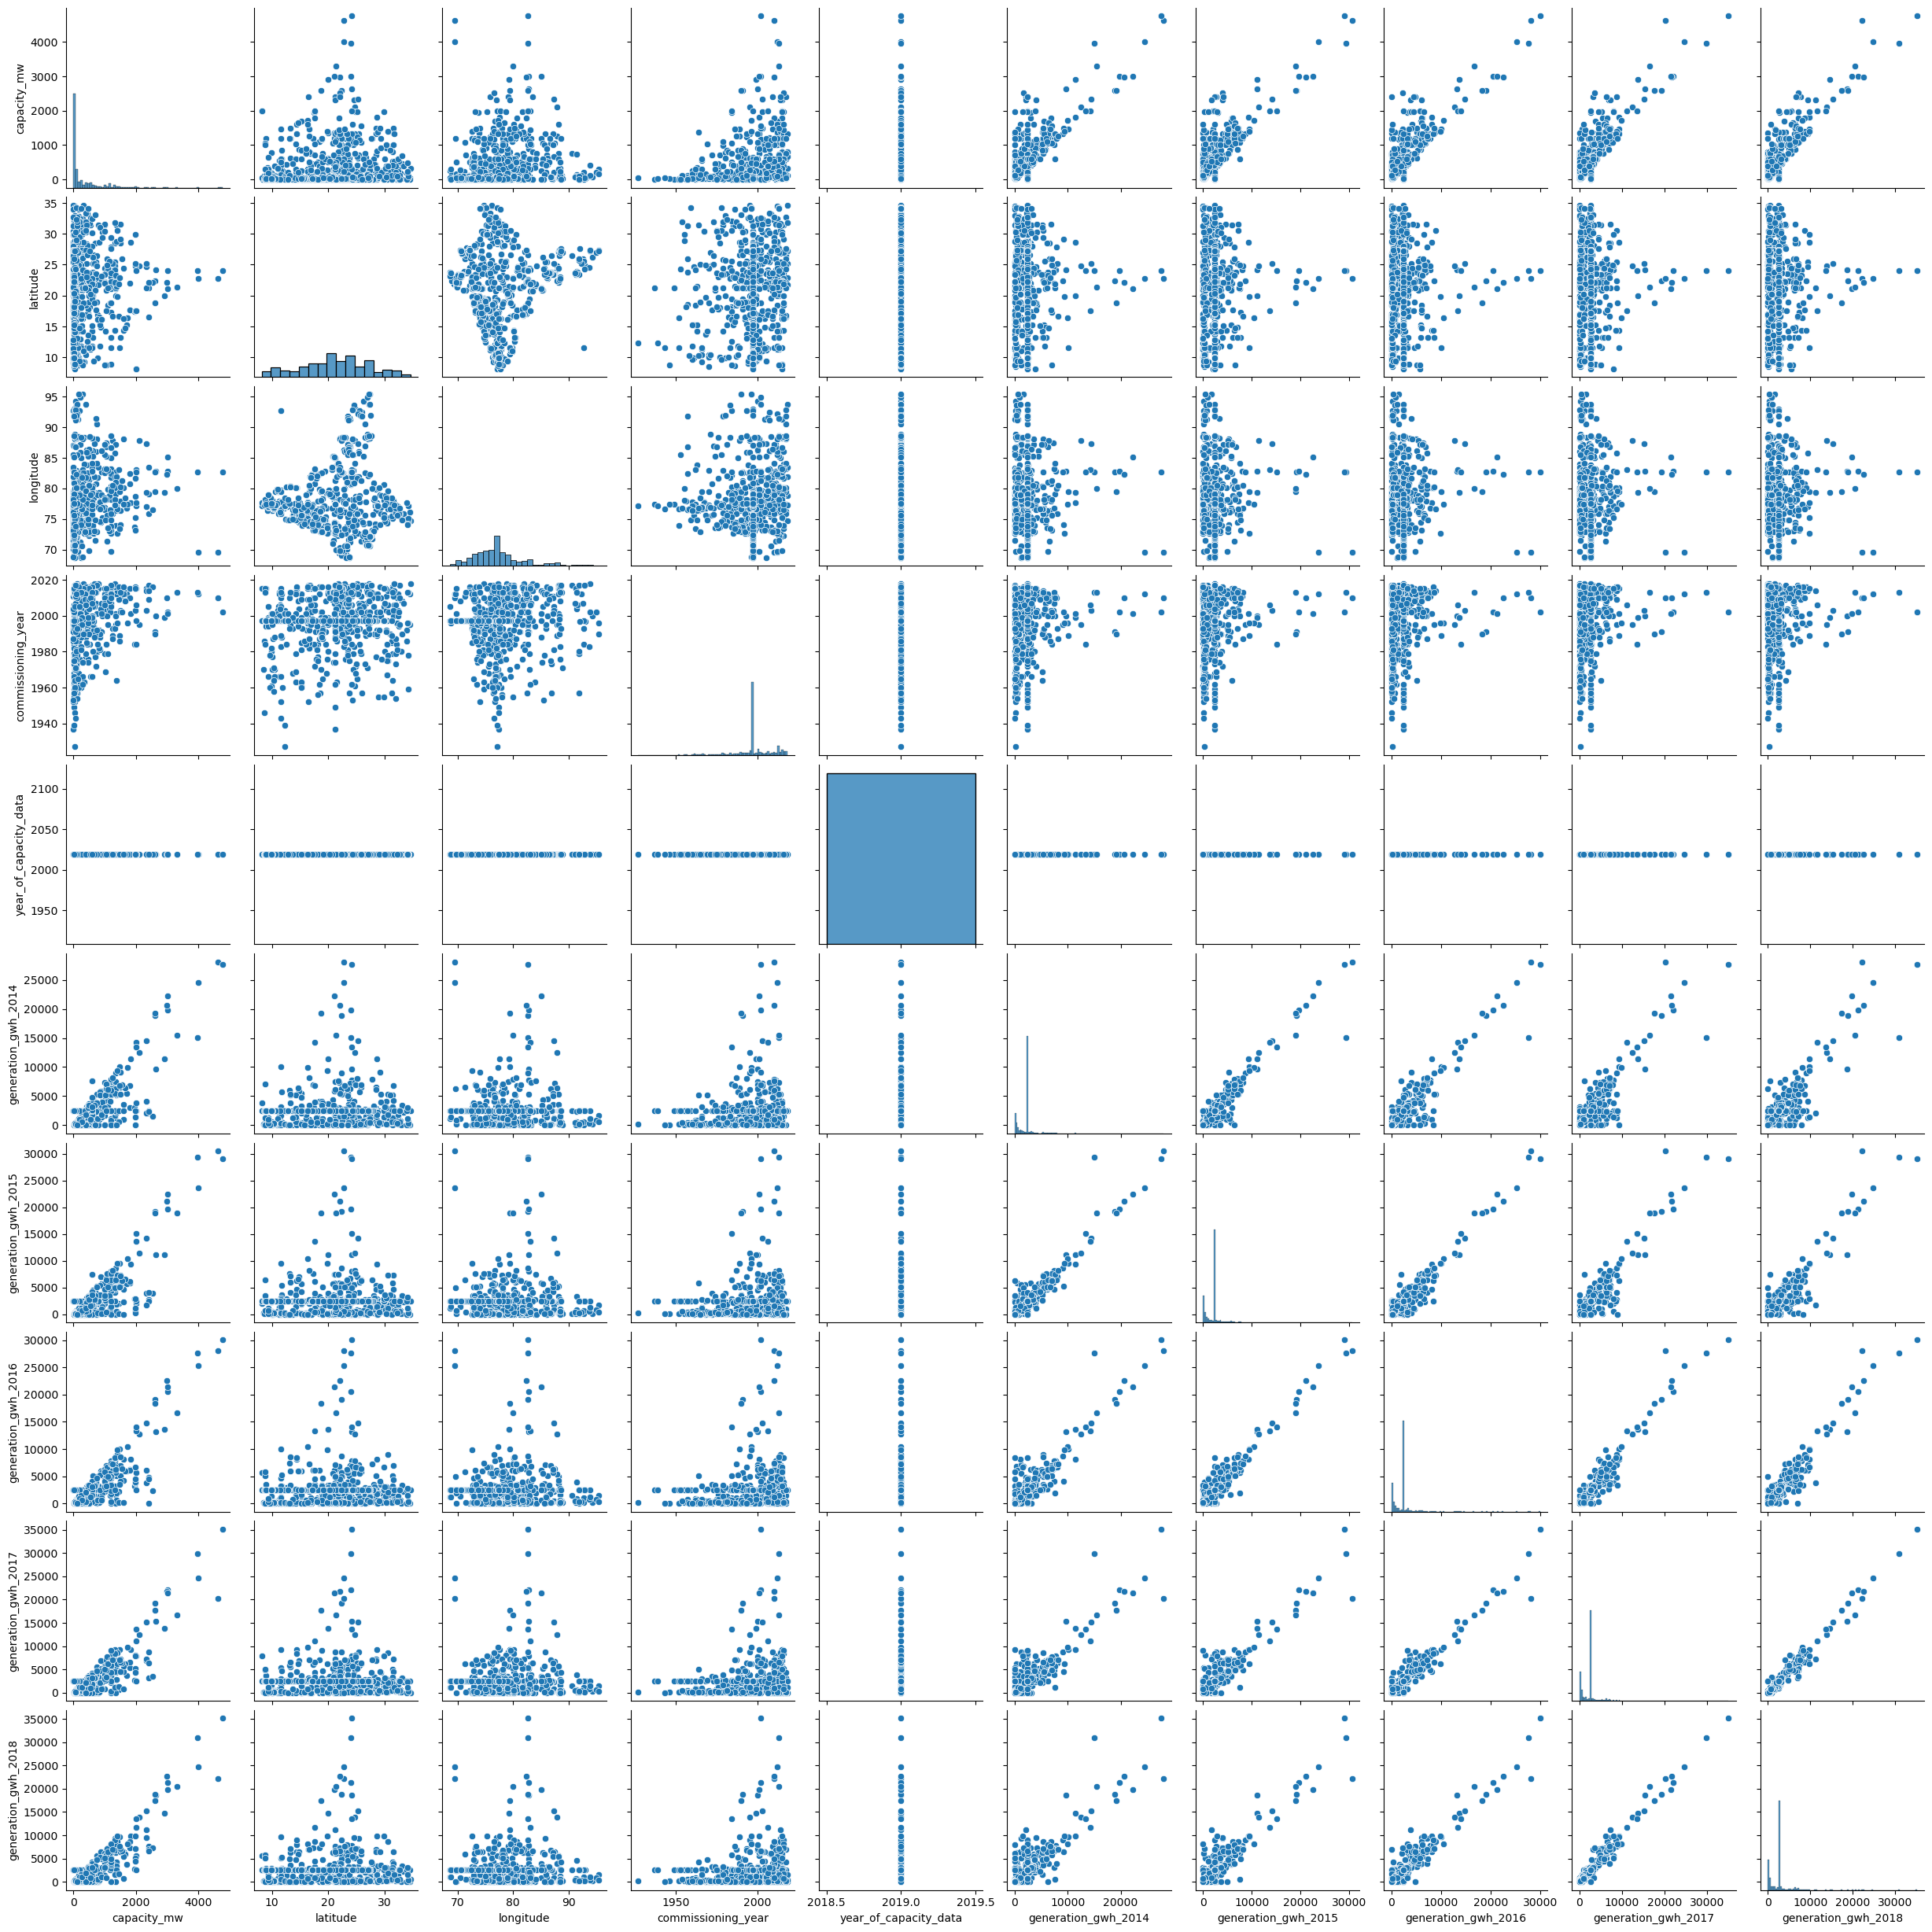

In [17]:
sns.pairplot(data=df, palette='Dark2')

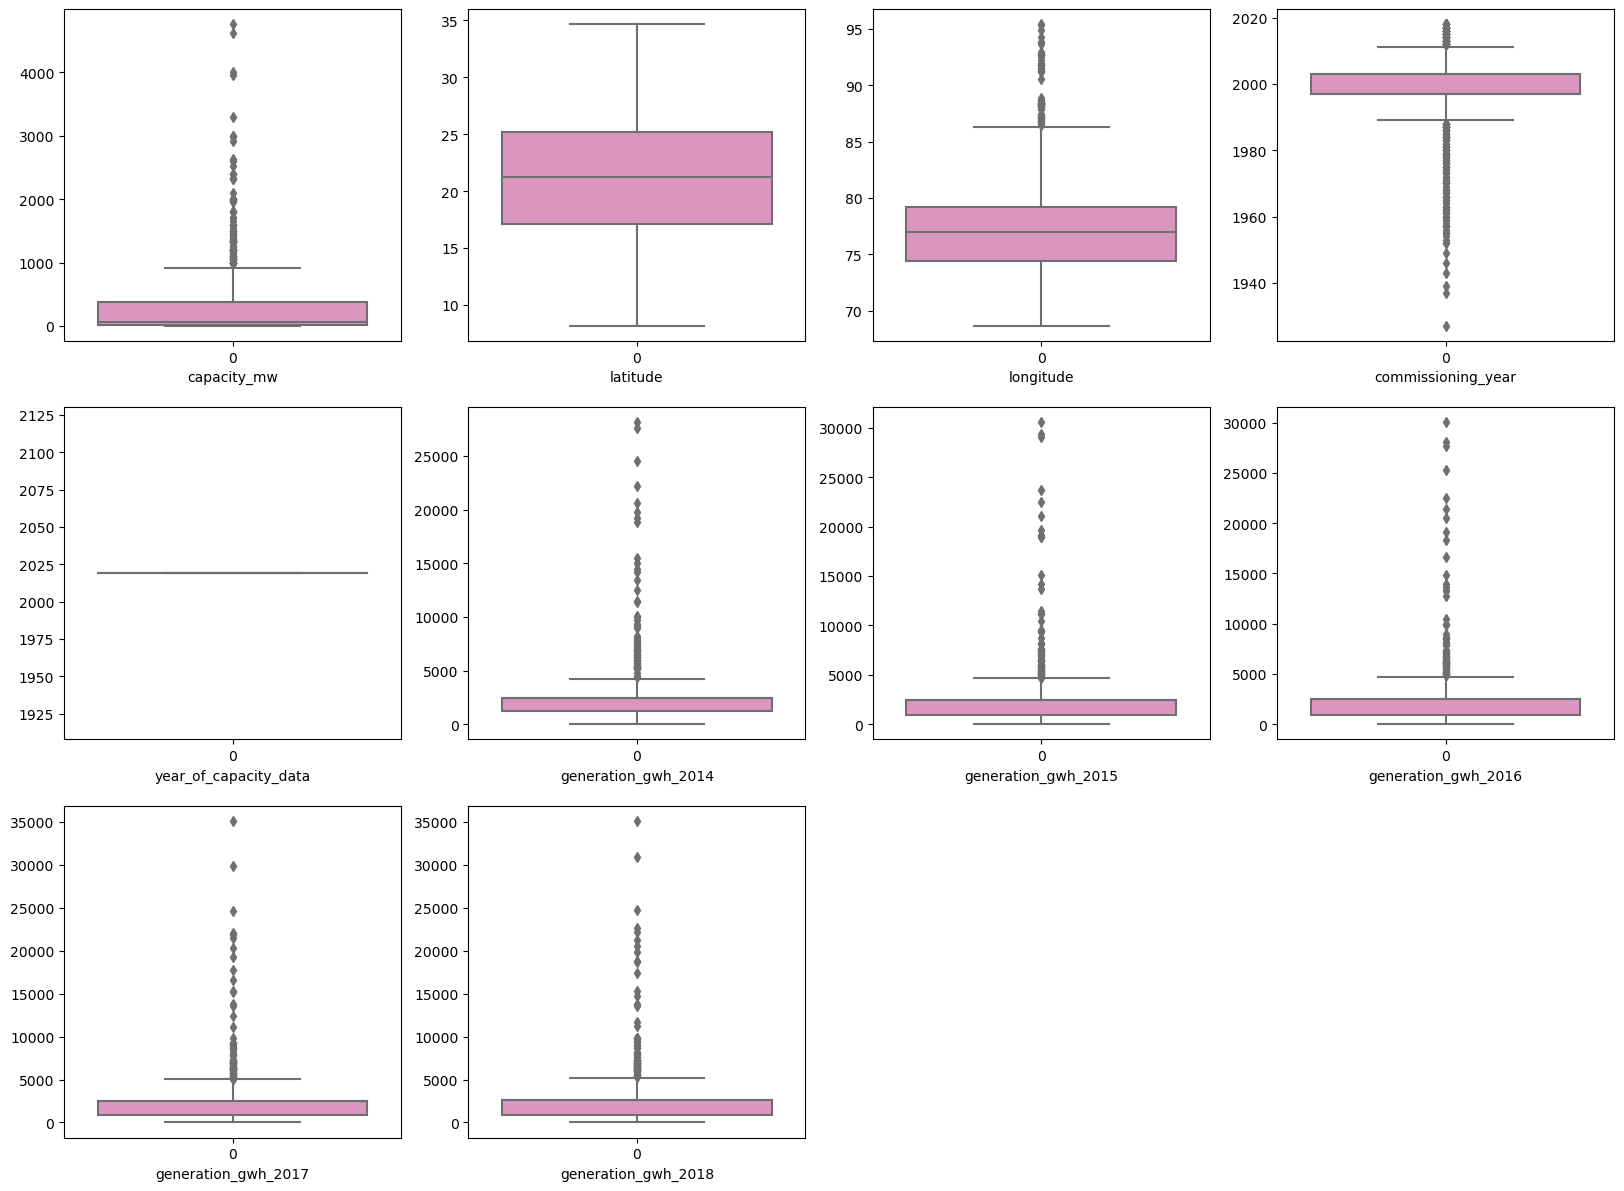

In [18]:
#Lets check the outliers by plotting boxplot

plt.figure(figsize = (20,25))
p=1
for i in numerical_col:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(df[i], palette = 'Set2_r')
        plt.xlabel(i)
        
    p+=1
plt.show()

In [19]:
df[['longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 
    'generation_gwh_2017','generation_gwh_2018']].skew()

longitude              1.141881
generation_gwh_2014    5.035446
generation_gwh_2015    5.364134
generation_gwh_2016    5.068427
generation_gwh_2017    5.110952
generation_gwh_2018    4.937907
dtype: float64

In [20]:
#Removing Skewness using Cuberoot method
df['longitude'] = np.cbrt(df['longitude'])

df['generation_gwh_2014'] = np.cbrt(df['generation_gwh_2014'])

df['generation_gwh_2015'] = np.cbrt(df['generation_gwh_2015'])

df['generation_gwh_2016'] = np.cbrt(df['generation_gwh_2016'])

df['generation_gwh_2017'] = np.cbrt(df['generation_gwh_2017'])

df['generation_gwh_2018'] = np.cbrt(df['generation_gwh_2018'])

In [21]:
df[['longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 
    'generation_gwh_2017','generation_gwh_2018']].skew()

longitude              1.002134
generation_gwh_2014   -0.371187
generation_gwh_2015   -0.269579
generation_gwh_2016   -0.279323
generation_gwh_2017   -0.331857
generation_gwh_2018   -0.316915
dtype: float64

In [22]:
#Encoding categorical columns using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
df

country  country_long   name  gppd_idnr  capacity_mw  latitude  \
0        0.0           0.0    0.0      657.0          2.5   28.1839   
1        0.0           0.0    1.0      519.0         98.0   24.7663   
2        0.0           0.0    2.0      853.0         39.2   21.9038   
3        0.0           0.0    3.0        0.0        135.0   23.8712   
4        0.0           0.0    4.0        1.0       1800.0   21.9603   
..       ...           ...    ...        ...          ...       ...   
902      0.0           0.0  902.0      491.0       1600.0   16.2949   
903      0.0           0.0  903.0      822.0          3.0   12.8932   
904      0.0           0.0  904.0      891.0         25.5   15.2758   
905      0.0           0.0  905.0      539.0         80.0   24.3500   
906      0.0           0.0  906.0      876.0         16.5    9.9344   

     longitude  primary_fuel  other_fuel1  commissioning_year  ...  source  \
0     4.183928           6.0          2.0         2011.000000  ...   109.0   
1     4.209822           1.0          2.0         1997.091082  ...   174.0   
2     4.108947           7.0          2.0         1997.091082  ...    21.0   
3     4.503868           2.0          2.0         2004.000000  ...    22.0   
4     4.351694           1.0          2.0         2015.000000  ...    22.0   
..         ...           ...          ...                 ...  ...     ...   
902   4.260882           1.0          2.0         2016.000000  ...    22.0   
903   4.275677           6.0          2.0         1997.091082  ...    77.0   
904   4.228027           7.0          2.0         1997.091082  ...    21.0   
905   4.193560           1.0          2.0         1997.091082  ...    59.0   
906   4.263084           7.0          2.0         1997.091082  ...    21.0   

       url  geolocation_source  year_of_capacity_data  generation_gwh_2014  \
0    128.0                 1.0                 2019.0            13.447576   
1    173.0                 2.0                 2019.0            13.447576   
2    205.0                 2.0                 2019.0            13.447576   
3     58.0                 2.0                 2019.0             8.516872   
4     58.0                 2.0                 2019.0            14.479241   
..     ...                 ...                    ...                  ...   
902   58.0                 2.0                 2019.0            13.447576   
903   22.0                 0.0                 2019.0            13.447576   
904  260.0                 2.0                 2019.0            13.447576   
905   82.0                 2.0                 2019.0            13.447576   
906  245.0                 2.0                 2019.0            13.447576   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0              13.440944            13.513816            13.657969   
1              13.440944            13.513816            13.657969   
2              13.440944            13.513816            13.657969   
3               9.449397             9.604586             8.723154   
4              18.086385            18.413278            17.528476   
..                   ...                  ...                  ...   
902             0.998289             6.158697             9.529548   
903            13.440944            13.513816            13.657969   
904            13.440944            13.513816            13.657969   
905            13.440944            13.513816            13.657969   
906            13.440944            13.513816            13.657969   

     generation_gwh_2018  generation_data_source  
0              13.752106                     0.0  
1              13.752106                     0.0  
2              13.752106                     0.0  
3               8.555526                     0.0  
4              19.380155                     0.0  
..                   ...                     ...  
902             8.821590                     0.0  
903            13.752106     

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 907 non-null    float64
 1   country_long            907 non-null    float64
 2   name                    907 non-null    float64
 3   gppd_idnr               907 non-null    float64
 4   capacity_mw             907 non-null    float64
 5   latitude                907 non-null    float64
 6   longitude               907 non-null    float64
 7   primary_fuel            907 non-null    float64
 8   other_fuel1             907 non-null    float64
 9   commissioning_year      907 non-null    float64
 10  owner                   907 non-null    float64
 11  source                  907 non-null    float64
 12  url                     907 non-null    float64
 13  geolocation_source      907 non-null    float64
 14  year_of_capacity_data   907 non-null    fl

In [24]:
#Checking the correlation between features and the target
cor = df.corr()
cor

country  country_long      name  gppd_idnr  \
country                     NaN           NaN       NaN        NaN   
country_long                NaN           NaN       NaN        NaN   
name                        NaN           NaN  1.000000   0.332205   
gppd_idnr                   NaN           NaN  0.332205   1.000000   
capacity_mw                 NaN           NaN  0.060240  -0.335742   
latitude                    NaN           NaN -0.135247  -0.105728   
longitude                   NaN           NaN  0.021606  -0.382209   
primary_fuel                NaN           NaN  0.040753   0.609180   
other_fuel1                 NaN           NaN -0.074663   0.002333   
commissioning_year          NaN           NaN -0.043569   0.044059   
owner                       NaN           NaN  0.098075   0.630589   
source                      NaN           NaN -0.014640   0.416384   
url                         NaN           NaN  0.041917   0.597080   
geolocation_source          NaN           NaN  0.036225  -0.464174   
year_of_capacity_data       NaN           NaN       NaN        NaN   
generation_gwh_2014         NaN           NaN  0.062720   0.282659   
generation_gwh_2015         NaN           NaN  0.043853   0.287099   
generation_gwh_2016         NaN           NaN  0.039647   0.267341   
generation_gwh_2017         NaN           NaN  0.054809   0.254791   
generation_gwh_2018         NaN           NaN  0.038173   0.252307   
generation_data_source      NaN           NaN       NaN        NaN   

                        capacity_mw  latitude  longitude  primary_fuel  \
country                         NaN       NaN        NaN           NaN   
country_long                    NaN       NaN        NaN           NaN   
name                       0.060240 -0.135247   0.021606      0.040753   
gppd_idnr                 -0.335742 -0.105728  -0.382209      0.609180   
capacity_mw                1.000000  0.050984   0.198924     -0.380395   
latitude                   0.050984  1.000000   0.028427     -0.010204   
longitude                  0.198924  0.028427   1.000000     -0.354780   
primary_fuel              -0.380395 -0.010204  -0.354780      1.000000   
other_fuel1                0.003105  0.036695   0.030375      0.004912   
commissioning_year         0.274292  0.102069   0.091163     -0.126650   
owner                     -0.311048 -0.071182  -0.303608      0.284296   
source                    -0.242122  0.055927  -0.241702      0.053613   
url                       -0.243830 -0.131038  -0.307054      0.589886   
geolocation_source         0.204865 -0.184275   0.258470     -0.483217   
year_of_capacity_data           NaN       NaN        NaN           NaN   
generation_gwh_2014        0.407636  0.065087  -0.093962      0.013619   
generation_gwh_2015        0.424643  0.056067  -0.103987      0.016153   
generation_gwh_2016        0.460992  0.072445  -0.063947      0.004585   
generation_gwh_2017        0.473211  0.047354  -0.083297      0.015603   
generation_gwh_2018        0.477255  0.053991  -0.081274      0.011025   
generation_data_source          NaN       NaN        NaN           NaN   

                        other_fuel1  commissioning_year  ...    source  \
country                         NaN                 NaN  ...       NaN   
country_long                    NaN                 NaN  ...       NaN   
name                      -0.074663           -0.043569  ... -0.014640   
gppd_idnr                  0.002333            0.044059  ...  0.416384   
capacity_mw                0.003105            0.274292  ... -0.242122   
latitude                   0.036695            0.102069  ...  0.055927   
longitude                  0.030375            0.091163  ... -0.241702   
primary_fuel               0.004912           -0.126650  ...  0.053613   
other_fuel1                1.000000            0.036904  ...  0.026590   
commissioning_year         0.036904            1.000000  ...  0.021528   
owner                      0.033687     

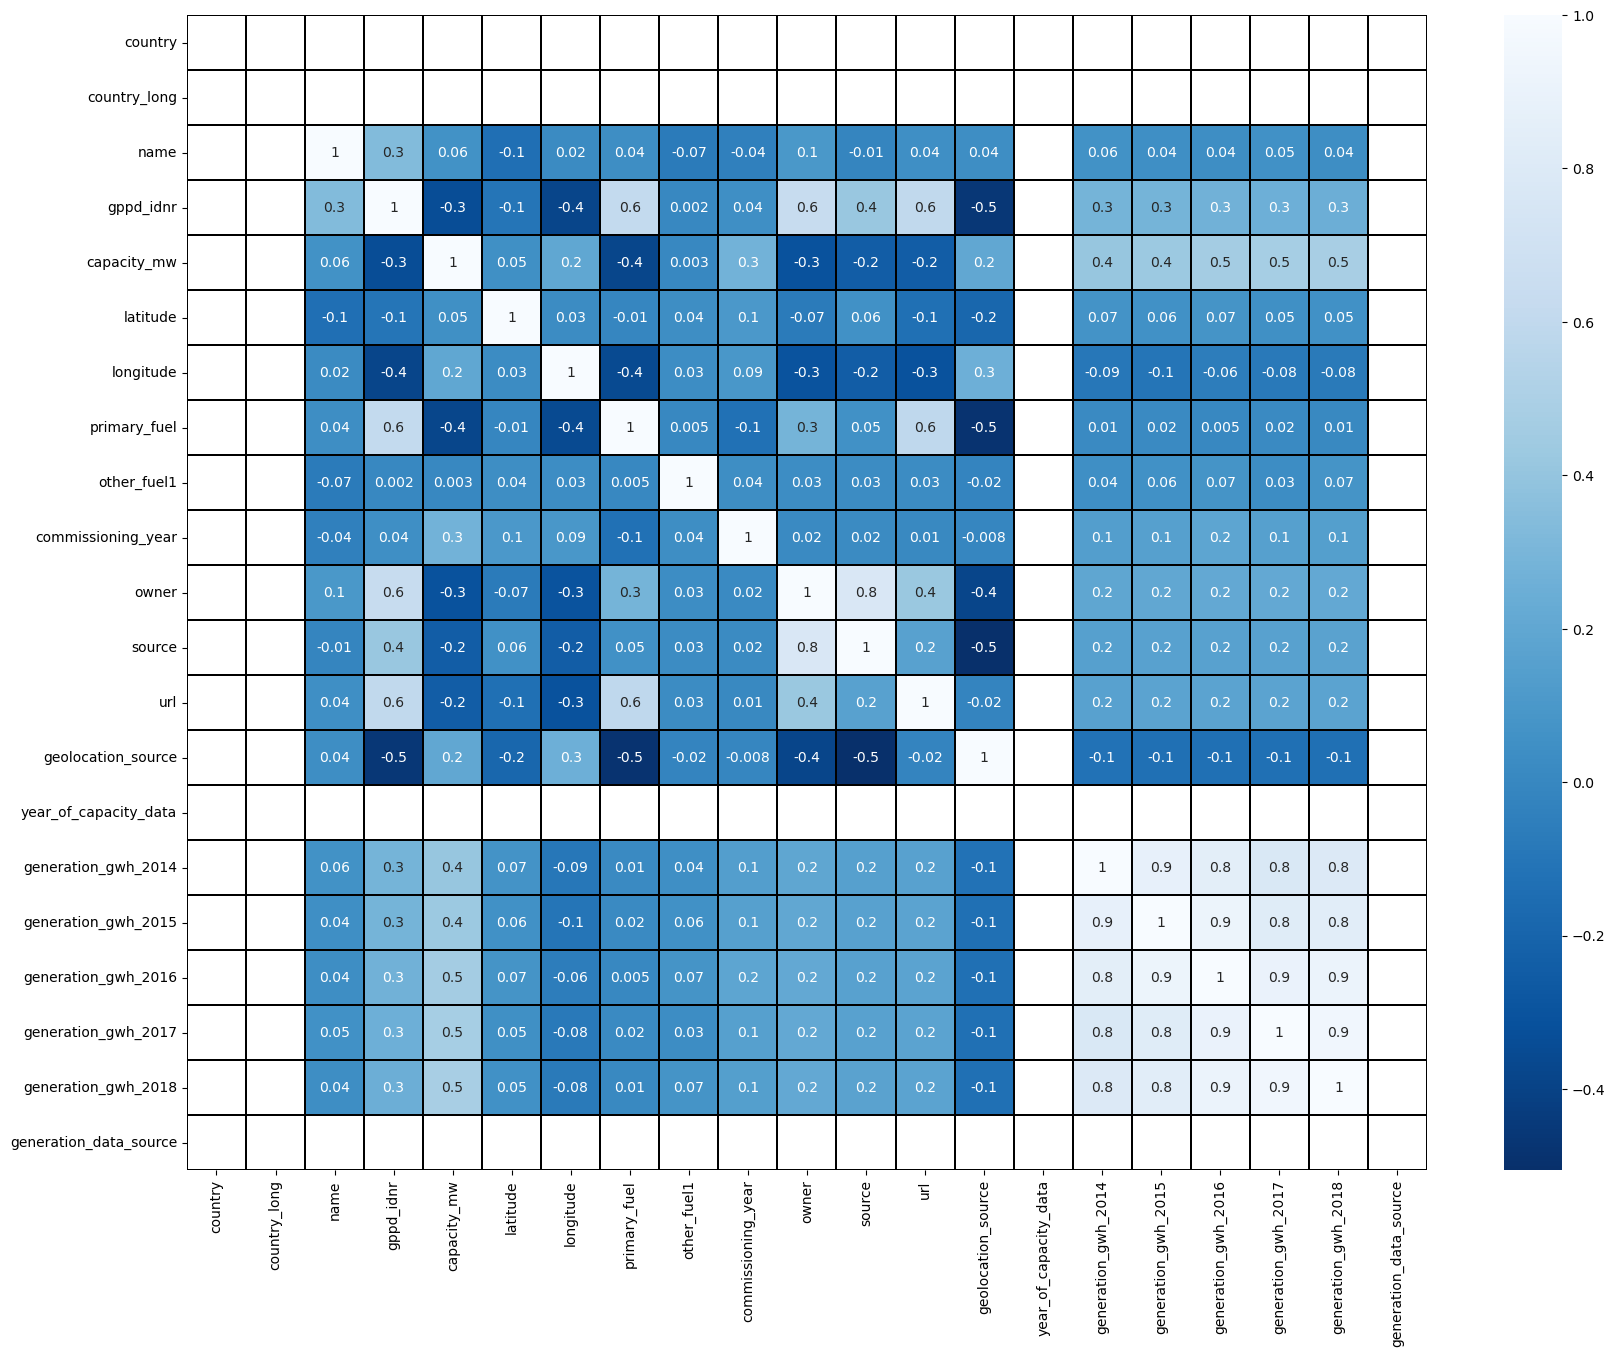

In [25]:
#Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), linewidths = 0.1, fmt = '.1g', linecolor = 'black', annot = True, cmap = 'Blues_r')
plt.yticks(rotation = 0);
plt.show()

In [26]:
cor['capacity_mw'].sort_values(ascending = False)

capacity_mw               1.000000
generation_gwh_2018       0.477255
generation_gwh_2017       0.473211
generation_gwh_2016       0.460992
generation_gwh_2015       0.424643
generation_gwh_2014       0.407636
commissioning_year        0.274292
geolocation_source        0.204865
longitude                 0.198924
name                      0.060240
latitude                  0.050984
other_fuel1               0.003105
source                   -0.242122
url                      -0.243830
owner                    -0.311048
gppd_idnr                -0.335742
primary_fuel             -0.380395
country                        NaN
country_long                   NaN
year_of_capacity_data          NaN
generation_data_source         NaN
Name: capacity_mw, dtype: float64

In [27]:
#Seperate features and label
x = df.drop("capacity_mw", axis=1)
y = df["capacity_mw"]

In [28]:
#Feature Scaling using Standard Scalarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

country  country_long      name  gppd_idnr  latitude  longitude  \
0        0.0           0.0 -1.730142   0.779137  1.149805  -0.892687   
1        0.0           0.0 -1.726323   0.252074  0.587311  -0.593158   
2        0.0           0.0 -1.722504   1.527719  0.116179  -1.760007   
3        0.0           0.0 -1.718684  -1.730142  0.439989   2.808168   
4        0.0           0.0 -1.714865  -1.726323  0.125479   1.047925   
..       ...           ...       ...        ...       ...        ...   
902      0.0           0.0  1.714865   0.145133 -0.806975  -0.002532   
903      0.0           0.0  1.718684   1.409321 -1.366853   0.168603   
904      0.0           0.0  1.722504   1.672853 -0.974707  -0.382577   
905      0.0           0.0  1.726323   0.328460  0.518793  -0.781270   
906      0.0           0.0  1.730142   1.615563 -1.853834   0.022940   

     primary_fuel  other_fuel1  commissioning_year     owner    source  \
0        1.225688     0.054303        1.069162e+00  2.095328  1.460215   
1       -0.967877     0.054303       -1.747794e-14  2.446913  2.917019   
2        1.664401     0.054303       -1.747794e-14 -0.656734 -0.512075   
3       -0.529164     0.054303        5.310801e-01 -0.620363 -0.489662   
4       -0.967877     0.054303        1.376637e+00 -0.620363 -0.489662   
..            ...          ...                 ...       ...       ...   
902     -0.967877     0.054303        1.453505e+00 -0.620363 -0.489662   
903      1.225688     0.054303       -1.747794e-14  0.701112  0.743019   
904      1.664401     0.054303       -1.747794e-14 -0.620363 -0.512075   
905     -0.967877     0.054303       -1.747794e-14  0.422268  0.339596   
906      1.664401     0.054303       -1.747794e-14  2.701509 -0.512075   

          url  geolocation_source  year_of_capacity_data  generation_gwh_2014  \
0    0.476673           -1.083349                    0.0             0.311080   
1    1.116401            0.394241                    0.0             0.311080   
2    1.571318            0.394241                    0.0             0.311080   
3   -0.518459            0.394241                    0.0            -0.810291   
4   -0.518459            0.394241                    0.0             0.545707   
..        ...                 ...                    ...                  ...   
902 -0.518459            0.394241                    0.0             0.311080   
903 -1.030242           -2.560940                    0.0             0.311080   
904  2.353208            0.394241                    0.0             0.311080   
905 -0.177271            0.394241                    0.0             0.311080   
906  2.139965            0.394241                    0.0             0.311080   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0               0.329243             0.332664             0.332256   
1               0.329243             0.332664             0.332256   
2               0.329243             0.332664             0.332256   
3              -0.537332            -0.501019            -0.702510   
4               1.337780             1.377524             1.143851   
..                   ...                  ...                  ...   
902            -2.372090            -1.235889            -0.533420   
903             0.329243             0.332664             0.332256   
904             0.329243             0.332664             0.332256   
905             0.329243             0.332664             0.332256   
906             0.329243             0.332664             0.332256   

     generation_gwh_2018  generation_data_source  
0               0.338536                     0.0  
1               0.338536                     0.0  
2               0.338536                     0.0  
3              -0.724252                     0.0  
4               1.489566                     0.0  
..                   ...                     ...  
902            -0.669837                     0.0  
903             0.338536     

In [29]:
#Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"] = x.columns

In [30]:
vif

VIF values                Features
0          NaN                 country
1          NaN            country_long
2     1.383866                    name
3     4.082263               gppd_idnr
4     1.125193                latitude
5     1.276177               longitude
6     3.818684            primary_fuel
7     1.031747             other_fuel1
8     1.119078      commissioning_year
9     3.799462                   owner
10    3.973670                  source
11    3.005611                     url
12    3.255804      geolocation_source
13         NaN   year_of_capacity_data
14    4.522614     generation_gwh_2014
15    8.237138     generation_gwh_2015
16   12.286151     generation_gwh_2016
17   10.285957     generation_gwh_2017
18   11.303402     generation_gwh_2018
19         NaN  generation_data_source

In [31]:
#Dropping TotalCharges column
x.drop("generation_gwh_2016", axis=1, inplace=True)

In [32]:
#Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"] = x.columns

In [33]:
vif

VIF values                Features
0          NaN                 country
1          NaN            country_long
2     1.383679                    name
3     4.082255               gppd_idnr
4     1.122453                latitude
5     1.265309               longitude
6     3.816699            primary_fuel
7     1.030154             other_fuel1
8     1.108929      commissioning_year
9     3.798227                   owner
10    3.972510                  source
11    3.002806                     url
12    3.254286      geolocation_source
13         NaN   year_of_capacity_data
14    4.499195     generation_gwh_2014
15    5.583392     generation_gwh_2015
16    9.582255     generation_gwh_2017
17   10.512476     generation_gwh_2018
18         NaN  generation_data_source

In [34]:
#importing necessary libraries:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [35]:
maxAccu = 0
maxRS = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is", maxAccu, "at random_state", maxRS)

Best accuracy is 0.6778858960705743 at random_state 191


In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state=maxRS)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [38]:
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR = LR.predict(x_test)
pred_train = LR.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_LR))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_LR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_LR))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_LR)))

R2_score:  0.6778858960705743
R2_score on training Data: 52.9120595913049
Mean Absolute Error: 249.70000419315076
Mean Squared Error: 128665.2657363578
Root mean squared error: 358.6994086088766


In [39]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR = RFR.predict(x_test)
pred_train = RFR.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_RFR))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_RFR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_RFR))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_RFR)))

R2_score:  0.9029311047151829
R2_score on training Data: 97.5556937345614
Mean Absolute Error: 106.78329315018316
Mean Squared Error: 38773.20196228375
Root mean squared error: 196.90912107437723


In [40]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
pred_train = knn.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_knn))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_knn))
print('Mean Squared Error:', mean_squared_error(y_test, pred_knn))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_knn)))

R2_score:  0.8320896608430154
R2_score on training Data: 84.29465909785495
Mean Absolute Error: 137.3604857142857
Mean Squared Error: 67070.1100758035
Root mean squared error: 258.9789761270275


In [41]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR = GBR.predict(x_test)
pred_train = GBR.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_GBR))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_GBR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_GBR))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_GBR)))

R2_score:  0.8868406374974085
R2_score on training Data: 96.68782087123789
Mean Absolute Error: 114.49028614616093
Mean Squared Error: 45200.37859050956
Root mean squared error: 212.60380662281088


In [42]:
lasso = Lasso()
lasso.fit(x_train,y_train)
pred_lasso = lasso.predict(x_test)
pred_train = lasso.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_lasso))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_lasso))
print('Mean Squared Error:', mean_squared_error(y_test, pred_lasso))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_lasso)))

R2_score:  0.6776325160072565
R2_score on training Data: 52.897508203923536
Mean Absolute Error: 248.70444436598277
Mean Squared Error: 128766.4758751918
Root mean squared error: 358.8404601981106


In [43]:
rd = Ridge()
rd.fit(x_train,y_train)
pred_rd = rd.predict(x_test)
pred_train = rd.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_rd))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_rd))
print('Mean Squared Error:', mean_squared_error(y_test, pred_rd))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_rd)))

R2_score:  0.6779365320040287
R2_score on training Data: 52.91148471118127
Mean Absolute Error: 249.47720802729802
Mean Squared Error: 128645.03971783134
Root mean squared error: 358.6712139520418


In [44]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr = dtr.predict(x_test)
pred_train = dtr.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_dtr))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_dtr))
print('Mean Squared Error:', mean_squared_error(y_test, pred_dtr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_dtr)))

R2_score:  0.782787138152377
R2_score on training Data: 100.0
Mean Absolute Error: 150.19335531135528
Mean Squared Error: 86763.51097343588
Root mean squared error: 294.5564648304903


In [45]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr = svr.predict(x_test)
pred_train = svr.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_svr))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_svr))
print('Mean Squared Error:', mean_squared_error(y_test, pred_svr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_svr)))

R2_score:  -0.2092163740743911
R2_score on training Data: -15.487162254941689
Mean Absolute Error: 335.20289969830344
Mean Squared Error: 483009.4187279817
Root mean squared error: 694.9887903613854


In [46]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(x_train, y_train)
pred_ETR = etr.predict(x_test)
pred_train = etr.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_ETR))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_ETR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_ETR))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_ETR)))

R2_score:  0.9185237796422262
R2_score on training Data: 99.9999998443353
Mean Absolute Error: 95.40514512820513
Mean Squared Error: 32544.863499127765
Root mean squared error: 180.40194982074823


In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
score = cross_val_score(LR, x, y, cv=5, scoring = 'r2')
print(score)
print(score.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_LR) - score.mean())*100)

[0.53130518 0.47609454 0.54508443 0.62922912 0.56991731]
<built-in method mean of numpy.ndarray object at 0x0000026B5ADBFE70>
Difference between R2 score and cross validation score is - 12.755977986319


In [49]:
score1 = cross_val_score(RFR, x, y, cv=5, scoring = 'r2')
print(score1)
print(score1.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_RFR) - score1.mean())*100)

[0.8435885  0.81389681 0.82510975 0.85838511 0.88332018]
<built-in method mean of numpy.ndarray object at 0x0000026B5AD86D90>
Difference between R2 score and cross validation score is - 5.807103327826335


In [50]:
score2 = cross_val_score(knn, x, y, cv=5, scoring = 'r2')
print(score2)
print(score2.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_knn) - score2.mean())*100)

[0.74210977 0.7440151  0.74931996 0.80989531 0.82223002]
<built-in method mean of numpy.ndarray object at 0x0000026B5AE9D2F0>
Difference between R2 score and cross validation score is - 5.857562716789689


In [51]:
score3 = cross_val_score(GBR, x, y, cv=5, scoring = 'r2')
print(score3)
print(score3.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_GBR) - score3.mean())*100)

[0.83546138 0.79710298 0.81444816 0.81773014 0.87540507]
<built-in method mean of numpy.ndarray object at 0x0000026B5ADBF750>
Difference between R2 score and cross validation score is - 5.881108889870323


In [52]:
score4 = cross_val_score(lasso, x, y, cv=5, scoring = 'r2')
print(score4)
print(score4.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_lasso) - score4.mean())*100)

[0.53180937 0.47929085 0.54402444 0.62889472 0.57096712]
<built-in method mean of numpy.ndarray object at 0x0000026B5AE9CDB0>
Difference between R2 score and cross validation score is - 12.663521577118642


In [53]:
score5 = cross_val_score(rd, x, y, cv=5, scoring = 'r2')
print(score5)
print(score5.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_rd) - score5.mean())*100)

[0.532013   0.47695824 0.544946   0.62927221 0.57021171]
<built-in method mean of numpy.ndarray object at 0x0000026B5AE9D350>
Difference between R2 score and cross validation score is - 12.725629958312535


In [54]:
score6 = cross_val_score(svr, x, y, cv=5, scoring = 'r2')
print(score6)
print(score6.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_svr) - score6.mean())*100)

[-0.14159723 -0.13835317 -0.15889528 -0.19550801 -0.14948544]
<built-in method mean of numpy.ndarray object at 0x0000026B5AE9C570>
Difference between R2 score and cross validation score is - -5.244854842664748


In [55]:
score7 = cross_val_score(etr, x, y, cv=5, scoring = 'r2')
print(score7)
print(score7.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_ETR) - score7.mean())*100)

[0.87523436 0.84920879 0.83477353 0.86999125 0.87300519]
<built-in method mean of numpy.ndarray object at 0x0000026B5AE9CB70>
Difference between R2 score and cross validation score is - 5.808115435244476


In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}

In [58]:
# Create a based model
RFR = RandomForestRegressor()

In [59]:
# Instantiate the grid search model
GCV = GridSearchCV(estimator = RFR, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [60]:
GCV.fit(x_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [61]:
GCV.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

In [63]:
Model = RandomForestRegressor(bootstrap = True, max_depth=90, max_features=3, min_samples_leaf=3, 
                              min_samples_split=10, n_estimators=100)

In [64]:
Model.fit(x_train, y_train)
pred=Model.predict(x_test)
print('R2_score: ', r2_score(y_test, pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred)))

R2_score:  0.8913507528688915
Mean Absolute Error: 114.32204388665463
Mean Squared Error: 43398.857993632366
Root mean squared error: 208.32392563897304


In [65]:
#Saving the model using .pk1
import joblib
joblib.dump(Model, "GlobalPowerPlantBase_Regression.pk1")

['GlobalPowerPlantBase_Regression.pk1']

In [66]:
#Lets load the saved model and get the predictions
model = joblib.load('GlobalPowerPlantBase_Regression.pk1')

#Prediction
prediction = model.predict(x_test)
prediction

array([ 136.35133956,  364.83698118,   42.98778033,  405.01341935,
        506.40333151, 1410.23119256,   89.46562731,  666.66154957,
         31.43640163,  322.75036507,   90.11604712,   58.18779874,
        113.09711563,   60.92391904,   93.29964205,   29.12863168,
       1146.08439898,  267.93373571,   30.64280808,   90.57856329,
         67.28054377,   32.19117886,   25.21383898,   21.87921961,
        700.39047645,  378.95923491,   75.90226678, 1127.08244612,
         64.11370938,  642.76807264,  280.40826079,  268.80975621,
         41.03073454,  468.48339195,   15.83486923,   36.95961083,
         59.68457785,   42.85858795, 1107.80261975,   82.87654484,
        274.49736523,   22.29499299,  108.48656409,  266.13942383,
        373.49558038,  642.9636731 ,  181.93102183,   38.72313024,
         79.54503636,  101.7242322 , 2207.60777886,   67.24975705,
        642.00671539, 3122.48188603,   48.84059288,  565.57538248,
       1053.95991313,   42.58992672,  753.09104427,  112.07978

In [67]:
a = np.array(y_test)
df=pd.DataFrame()
df['Predicted'] = prediction
df['Original'] = a
df

Predicted  Original
0     136.351340      99.0
1     364.836981     420.0
2      42.987780       9.0
3     405.013419     330.0
4     506.403332     540.0
..           ...       ...
268   558.690643     780.0
269    30.819566     113.6
270  2192.351961    2630.0
271   271.021655     100.0
272    46.640420      50.4

[273 rows x 2 columns]